# 1 Import de bibliotecas

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

from hypopt import GridSearch

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier    # MLP

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2 Pre-processamento

In [2]:
df_test = pd.read_csv('test.csv')
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [3]:
df_train = pd.read_csv('train.csv')
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
df = pd.concat([df_train,df_test],ignore_index=True)
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508146 entries, 0 to 508145
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    508146 non-null  int64  
 1   Gender                508146 non-null  object 
 2   Age                   508146 non-null  int64  
 3   Driving_License       508146 non-null  int64  
 4   Region_Code           508146 non-null  float64
 5   Previously_Insured    508146 non-null  int64  
 6   Vehicle_Age           508146 non-null  object 
 7   Vehicle_Damage        508146 non-null  object 
 8   Annual_Premium        508146 non-null  float64
 9   Policy_Sales_Channel  508146 non-null  float64
 10  Vintage               508146 non-null  int64  
 11  Response              381109 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 46.5+ MB


In [6]:
df.isnull().sum()

id                           0
Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
dtype: int64

In [7]:
df = df[(df['Response'] == 1) | (df['Response'] == 0)]
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0.0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0.0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0.0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0.0


In [8]:
df = df.drop_duplicates()

In [9]:
rows, columns = df.shape
rows

381109

In [10]:
df.drop(columns=['id'])

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0.0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0.0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0.0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0.0


In [11]:
### Preparando a base de dados para treinamento
df['Gender'] = df['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
df['Vehicle_Age'] = df['Vehicle_Age'].map( {'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2 } ).astype(int)
df['Vehicle_Damage'] = df['Vehicle_Damage'].map( {'No': 0, 'Yes': 1} ).astype(int)
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1.0
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0.0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1.0
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0.0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0.0


In [14]:
X = df.drop(columns=['id','Response'])
y = df['Response']

In [13]:
nr = NearMiss()
X, y = nr.fit_resample(X, y)

In [14]:
X.shape

(93420, 10)

In [15]:
y.shape

(93420,)

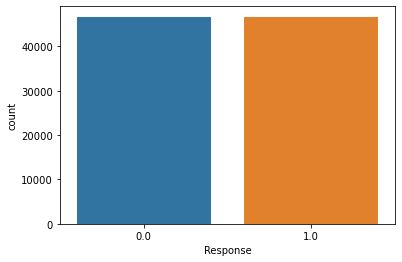

In [16]:
ax = sns.countplot(x=y)

## 2.1 Todos os dados

In [23]:
X_df = df.drop(columns=['id','Response'])
y_df = df['Response']

## 2.2 Dados de pessoas sem interesse

In [24]:
df_no = df[(df['Response'] == 0)]
df_no.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0.0
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0.0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0.0
5,6,0,24,1,33.0,0,0,1,2630.0,160.0,176,0.0
6,7,1,23,1,11.0,0,0,1,23367.0,152.0,249,0.0


In [25]:
X_df_no = df_no.drop(columns=['id','Response'])
y_df_no = df_no['Response']

# 3 Avaliação acurácia sobre dados de treino, teste e todos os dados.

## 3.1 Treinamento Random Forest

In [52]:
X = df.drop(columns=['id','Response'])
y = df['Response']

nr = NearMiss()
X, y = nr.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 

pipe = Pipeline([('z-score', StandardScaler()),
                ('reduce_dim', PCA(n_components=2)),
                ('classify',
                 RandomForestClassifier(criterion='entropy', max_depth=10))])
clf = pipe.fit(X_train, y_train)

##Predicts na base de teste e todos dados
y_test_pred = clf.predict(X_test)
y_df_pred = clf.predict(X_df)


print("Test Data Score:\n",clf.score(X_test,y_test)*100)
print("")
print("DF Score:\n",clf.score(X_df,y_df)*100)
print("")
print("Classification Report Test:\n",classification_report(y_test,y_test_pred))
print("")
print("Classification DF:\n",classification_report(y_df,y_df_pred))
print("")
print("Confusion Matrix Test:\n",confusion_matrix(y_test,y_test_pred))
print("")
print("Confusion Matrix DF:\n",confusion_matrix(y_df,y_df_pred))
print("")

Test Data Score:
 90.63012916577465

DF Score:
 36.368597960163626

Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.84      1.00      0.91     14013
         1.0       1.00      0.81      0.90     14013

    accuracy                           0.91     28026
   macro avg       0.92      0.91      0.91     28026
weighted avg       0.92      0.91      0.91     28026


Classification DF:
               precision    recall  f1-score   support

         0.0       0.92      0.30      0.45    334399
         1.0       0.14      0.82      0.24     46710

    accuracy                           0.36    381109
   macro avg       0.53      0.56      0.35    381109
weighted avg       0.83      0.36      0.43    381109


Confusion Matrix Test:
 [[13988    25]
 [ 2601 11412]]

Confusion Matrix DF:
 [[100363 234036]
 [  8469  38241]]



In [49]:
clf.score(X_train,y_train)

0.91005291005291

In [50]:
clf.score(X_test,y_test)

0.9062299293513166

In [51]:
clf.score(X_df,y_df)

0.37335512937243676

Avaliando-se a acurácia sobre os dados de todo dataset, observamos que o modelo cai bastante em performance (90,61% de acurácia sobre os dados de teste e 36,55% sobre os dados de produção)
Indicando que a técnica de amostragem com rebalanceamento das classes em 50% / 50% não foi efetiva para o aprendizado e generalização do modelo.


## 3.2 Próximos passos

Variar a taxa de rebalanceamento (split) nos dados de amostragem a fim de aumentar o aprendizado do modelo. Uma função de custo personalizada será adotada para selecionar o melhor modelo.

# 4 Definição da função de custo para seleção de modelo

Definições:

- <b>Custo abordagem:</b> Custos relacionados a abordagem de clientes sem interesse devido ao erro de classificação da classe 0
- <b>Custo oportunidade:</b> Custos relacionados ao custo de oportunidade da não abordagem e aquisição de seguros de veículos por clientes com interesse devido ao erro de classificação da classe 1

         Custo total = Custo abordagem (Cab) + Custo oportunidade (Cop)

Onde:

    Cab = (1-Rec0)* (1-%int) * Pop0 * Mcab
    Cop = (1-Rec1) * %int * Pop0 * Mcop

Em que:

    Rec0: Recall do modelo em relação à classe 0
    Rec1: Recall  do modelo em relação à classe 1
    %int: % Pessoas interessadas ao oferecer desconto
    Pop0: Número de registros de pessoas não interessadas
    Mcab: Média Custo Abordagem Individual
    Mcob: Média de Custo Oportunidade individual


Equação:

       Custo = (1 Rec0)* (1-%int) * Pop0 * Mcab + (1-Rec1) * %int * Pop0 * Mcop
       
Chamando:

    N = Mcop / Mcab 
    
Então:

    Mcop = N * Mcab
    
Substituindo na equação:

    Custo = (1-Prec0)* 0,8925 * 334399 * Mcab + (1-Prec1) * 0,1075 * 334399 * N * Mcab

Fatorando:

    Custo = Mcab * ( ( (1-Rec0) * (1-%int) * 334399) + (N * (1-Rec1) * %int * 334399 )
    
- A proporção de pessoas interessadas (%int) após a oferta de 10% de desconto é uma variável mensurável escolhendo-se um modelo e utilizando-se as métricas de recall das classes para inferir quantas pessoas terão de fato interesse após a oferta do desconto, conforme desenvolvido na <b>seção 4.1.</b>

- A proporção entre os custos de oportunidade e custo de abordagem é uma variável dependente do negócio mas é possível estimá-la conforme desenvolvido na <b>seção 4.2.<b/>

## 4.1 Estimativa do valor de % Interessados (%Int)

Escolheremos o modelo random forest com a taxa de rebalanceamento de 0,46 que possui as seguintes métricas de performance:
- Recall 0: 0,7199692582812748, 
- Recall 1: 0,7402911582102334, 
- Precisão 0: 0,9520301477333839, 
- Precisão 1: 0,2696828132677175

In [18]:
X = df.drop(columns=['id','Response'])
y = df['Response']

nr = NearMiss(sampling_strategy = 0.46)
X, y = nr.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 

pipe = Pipeline([('z-score', StandardScaler()),
                ('reduce_dim', PCA(n_components=2)),
                ('classify',
                 RandomForestClassifier(criterion='entropy', max_depth=10))])
clf = pipe.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)
y_df_pred = clf.predict(X_df)

print("Test Data Score:\n",clf.score(X_test,y_test)*100)
print("")
print("DF Score:\n",clf.score(X_df,y_df)*100)
print("")
print("Classification Report Test:\n",classification_report(y_test,y_test_pred))
print("")
print("Classification DF:\n",classification_report(y_df,y_df_pred))
print("")
print("Confusion Matrix Test:\n",confusion_matrix(y_test,y_test_pred))
print("")
print("Confusion Matrix DF:\n",confusion_matrix(y_df,y_df_pred))
print("")

Test Data Score:
 77.97913481428186

DF Score:
 72.24599786412811

Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.87      0.80      0.83     30463
         1.0       0.63      0.74      0.68     14013

    accuracy                           0.78     44476
   macro avg       0.75      0.77      0.76     44476
weighted avg       0.79      0.78      0.78     44476


Classification DF:
               precision    recall  f1-score   support

         0.0       0.95      0.72      0.82    334399
         1.0       0.27      0.74      0.40     46710

    accuracy                           0.72    381109
   macro avg       0.61      0.73      0.61    381109
weighted avg       0.87      0.72      0.77    381109


Confusion Matrix Test:
 [[24378  6085]
 [ 3709 10304]]

Confusion Matrix DF:
 [[240757  93642]
 [ 12131  34579]]



In [19]:
## Realizando predict sobre os dados de classe 0:
df_no = df[(df['Response'] == 0)]
df_no.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0.0
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0.0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0.0
5,6,0,24,1,33.0,0,0,1,2630.0,160.0,176,0.0
6,7,1,23,1,11.0,0,0,1,23367.0,152.0,249,0.0


In [20]:
X_df_no = df_no.drop(columns=['id','Response'])
y_df_no = df_no['Response']

### 4.1.1 Sem oferecer desconto o modelo acerta 71,99% das classes 0 conforme previsto

In [21]:
clf.score(X_df_no,y_df_no)*100

71.99692582812747

In [23]:
y_pred = clf.predict(X_df_no)

In [24]:
len(y_pred)

334399

In [25]:
y_pred.sum()

93642.0

In [26]:
print("Confusion Matrix Test:\n",confusion_matrix(y_df_no,y_pred))

Confusion Matrix Test:
 [[240757  93642]
 [     0      0]]


### 4.1.2 Oferecendo desconto de 10%

In [27]:
X_df_no['Annual_Premium'] = X_df_no['Annual_Premium']*0.9

In [28]:
y_df_pred = clf.predict(X_df_no)

In [29]:
len(y_df_pred)

334399

In [30]:
y_df_pred.sum()

89761.0

O modelo prediz que agora há 89761 pessoas pertencentes à classe 1 após ofertar 10% de desconto.

### 4.1.3 Matriz de confusão:
    
             0       1
          0 (X       K)
          1 (P       Y)

     Tot:  244.638  89761
     
Em que: K = 89761 - Y e P = 244.638-X

             0           1
          0 (X           89761 - Y)
          1 (244.638-X   Y        )
          
       Tot:  244.638       89761

Precisão 0: 0,9520301477333839, Precisão 1: 0,2696828132677175

- Como a precisão da classe 0 é 0,9520 então X = 0,9520 * 244638 =>    X = 232.903
- Como a precisão da classe 1 é 0,2697 então Y = 0,2697 * 89761 =>     Y =  24.207


             0               1            Tot
          0 (232.903       65.554)       298.457
          1 (11.735        24.207)       35.942

     Tot:   244.638         89.761       334.399

### 4.1.4 Interpretação
- Dos 334.399 registros de pessoas sem interesse (Classe 0), após ofertar 10% de desconto o modelo classificou 244.638 delas como pessoas não interessadas (Classe 0) sendo 232.903 classificadas corretamente e 11.735 classificadas erroneamente. Há, portanto, 11.735 pessoas interessadas de fato e que não chegarão a ser ofertadas o seguro de veículo que contribuirão para o aumento do custo de oportunidade.

- Dos 334.399 registros de pessoas sem interesse (Classe 0),  após ofertar 10% de desconto o modelo classificou 89.761 delas como pessoas interessadas (Classe 1) sendo 65.554 classificadas erroneamente e 24.207 classificadas corretamente. Há, portanto, 24.207 interessadas de fato e 65.554 que serão abordadas e recusarão a oferta que contribuirão para o aumento do custo de abordagem.

            Total de pessoas interessadas: 11.735 + 24.207 = 35.942
            % Interessados após oferta de 10% de desconto: 35.942 / 334.399 = 0,1074823788348649 = 10,75%



- 10,75% das pessoas tendem a adquirir seguro de veículos após a oferta de 10% de desconto no seguro de saúde.

### 4.1.5 % Interessados (% Int) = 10,75% 
( ao oferecer 10% de desconto )

## 4.2 Estimativa da proporção de custos (N)

    N = Mcop / Mcab 
    
O custo de abordagem de um cliente pode variar de acordo com cada cliente. A visita domiciliar a um cliente pode custar mais que um telefonema, por exemplo.


#### 4.2.1 Custo de abordagem

- Um mês tem em média 160 horas trabalhadas, 
- Supondo que cada telefonema para oferta do seguro tem uma duração de 20
- Supondo que um telefonema de 20 minutos custa 2,00 reais
- Supondo que a média do salário de um vendedor seja 2.500,00 reais mensais
- A hora de um vendedor custa 15,62 reais.
- O custo médio para deslocamento do vendedor ao cliente é de 12 reais.
- Um vendedor demora cerca de 2 horas de deslocamento ida e volta até o cliente.

Cabmin = 2 (Custo telefonema) + 20/60  * 15,62 (Horas trabalhadas) = 7,21
Cabmax = 2 (Custo telefonema) + 120/60 * 15,62 (Horas trabalhadas) + 12 (Combustivel) = 45,24

Como não há informações sobre como os clientes são abordados adotaremos a média simples para calcular a média do custo de abordagem:

<b> Mcab </b> = (7,21 + 45,24) / 2 = 26,23

####  4.2.2 Custo de oportunidade
- Supondo que a parcela de um seguro de saúde seja de 70 reais ou 840,00 anuais.
- Supondo que o valor do seguro de veículo seja igual ao seguro de saúde.

Mcop = Valor seguro do veículo - (Valor seguro de saude * desconto) - Custo abordagem do cliente
Mcop = 840 - 840 * 10% - 26,23
Mcop = 729,77

#### 4.2.3 Proporção Custo de Oportunidade vs Custo de Abordagem (N) = 28

N = Mcop / Mcab = 729,77/ 26,23 = 28

# 5 Avaliação do Modelo

## 5.1 Avaliando a performance para multiplos valores de N

In [15]:
def recall0(y_true, y_pred):
    matrix = confusion_matrix(y_true,y_pred)
    TP = matrix[0,0]
    FN = matrix[0,1]
    
    rec0 = TP / (TP + FN)

    return rec0

In [16]:
def recall1(y_true, y_pred):
    matrix = confusion_matrix(y_true,y_pred)
    FP = matrix[1,0]
    TN = matrix[1,1]
    
    rec1 = TN / (TN + FP)

    return rec1

In [20]:
N = [5,10,15,20,25,30,35,40]
Split = [0.15,0.20,0.25,0.30,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
Custos = []
Resumo = []

In [103]:
for i in Split:
    
    print(i)


    X = df.drop(columns=['id','Response'])
    y = df['Response']

    nr = NearMiss(sampling_strategy=i)
    X, y = nr.fit_resample(X, y)
    
        ##smt = SMOTE(sampling_strategy = i)
        ##X, y = smt.fit_resample(X, y)


        ###Split dos dados em treinamento, validacao e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 

    pipe = Pipeline([('z-score', StandardScaler()),
                ('reduce_dim', PCA(n_components=2)),
                ('classify',
                 RandomForestClassifier(criterion='entropy', max_depth=10))])
    clf = pipe.fit(X_train, y_train)

    scoretreino = clf.score(X_train,y_train)
    scoreteste = clf.score(X_test,y_test)
    scoreprod = clf.score(X_df,y_df)
        
    y_test_pred = clf.predict(X_test)
    y_df_pred = clf.predict(X_df)
       
    rec0 = recall0(y_df, y_df_pred)
    rec1 = recall1(y_df, y_df_pred)
        
    for k in N:
        
        
        CustoAb = (1-rec0) * 0.8925 * 334399
        CustoOp = k * (1-rec1) * 0.1075 * 334399

        Custo =  CustoAb + CustoOp

        Perc_CustoAb = CustoAb/Custo 
        Perc_CustoOp = CustoOp/Custo

        Custos.append(Custo)
        Resumo.append(np.array([k,i,scoretreino,scoreteste,scoreprod,rec0,rec1,Perc_CustoAb,Perc_CustoOp,Custo]))


0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95


In [104]:
df_resumo = pd.DataFrame(np.array(Resumo), columns=['N', 'Split','Acuracia_Treino', 'Acuracia_Teste', 'Acuracia_Prod', 'Recall_0_Prod','Recall_1_Prod','Perc_CustoAB','Perc_CustoOP','Custo']) 

In [136]:
df_resumo.head()

,N,Split,Acuracia_Treino,Acuracia_Teste,Acuracia_Prod,Recall_0_Prod,Recall_1_Prod,Perc_CustoAB,Perc_CustoOP,Custo
0,5.0,0.15,0.871173,0.87058,0.876156,0.996809,0.012396,0.005336,0.994664,178463.775654
1,10.0,0.15,0.871173,0.87058,0.876156,0.996809,0.012396,0.002675,0.997325,355975.253809
2,15.0,0.15,0.871173,0.87058,0.876156,0.996809,0.012396,0.001785,0.998215,533486.731963
3,20.0,0.15,0.871173,0.87058,0.876156,0.996809,0.012396,0.001339,0.998661,710998.210117
4,25.0,0.15,0.871173,0.87058,0.876156,0.996809,0.012396,0.001072,0.998928,888509.688272


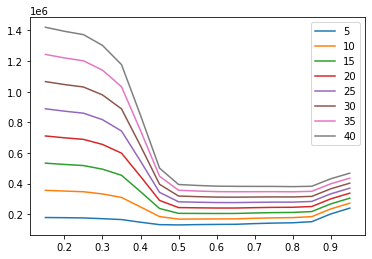

In [106]:
fig, ax = plt.subplots(1, 1)
for i in N:
    ax.plot( df_resumo[df_resumo["N"]==i].Split , df_resumo[df_resumo["N"]==i].Custo, Label = i)
    plt.legend()


- O custo atinge o mínimo utilizando dados de treinamento com split entre 0.5 á 0.9 para 5 < N < 40

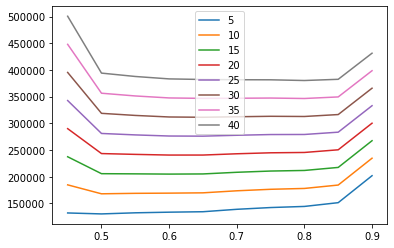

In [117]:
fig, ax = plt.subplots(1, 1)
for i in N:
    ax.plot( df_resumo[ (df_resumo["N"]==i) & (df_resumo["Split"]>=0.45) & (df_resumo["Split"]<=0.9) ].Split , 
            df_resumo[ (df_resumo["N"]==i) & (df_resumo["Split"]>=0.45) & (df_resumo["Split"]<=0.9) ].Custo, 
            Label = i)
    plt.legend()

In [118]:
df_resumo[ (df_resumo["N"]==35) & (df_resumo["Split"]>=0.45) & (df_resumo["Split"]<=0.9) ]

,N,Split,Acuracia_Treino,Acuracia_Teste,Acuracia_Prod,Recall_0_Prod,Recall_1_Prod,Perc_CustoAB,Perc_CustoOP,Custo
54,35.0,0.45,0.781998,0.776759,0.731024,0.734395,0.706894,0.176923,0.823077,448049.574048
62,35.0,0.50,0.799982,0.795785,0.702489,0.690238,0.790195,0.259381,0.740619,356420.613117
70,35.0,0.55,0.815660,0.812494,0.693662,0.679245,0.796874,0.272503,0.727497,351297.439989
78,35.0,0.60,0.833184,0.831835,0.688362,0.672571,0.801413,0.281149,0.718851,347579.087608
86,35.0,0.65,0.852022,0.849488,0.685240,0.668797,0.802954,0.285057,0.714943,346766.037270
94,35.0,0.70,0.870488,0.865862,0.670281,0.651192,0.806936,0.299997,0.700003,347010.105983
102,35.0,0.75,0.885232,0.883078,0.659475,0.638498,0.809655,0.310586,0.689414,347377.908235
110,35.0,0.80,0.899629,0.894323,0.652246,0.629879,0.812374,0.318769,0.681231,346529.232988
118,35.0,0.85,0.908689,0.908718,0.629951,0.603937,0.816185,0.338235,0.661765,349477.078960
126,35.0,0.90,0.912904,0.910151,0.480839,0.433817,0.817469,0.423893,0.576107,398633.464512


In [167]:
for i in N:
    CustoMinimo = df_resumo[ (df_resumo["N"]==i)].Custo.min()
    SplitCustoMinimo = df_resumo[ (df_resumo["Custo"]==CustoMinimo) ].Split.min()
    PropOP = df_resumo[ (df_resumo["Custo"]==CustoMinimo) ].Perc_CustoOP.min()
    Recall_1 = df_resumo[ (df_resumo["Custo"]==CustoMinimo) ].Recall_1_Prod.min()
    print("N:",i, "Split Cmin: ", SplitCustoMinimo,  "Custo Mínimo: ", f'{CustoMinimo:6g}', "Recall Classe 1 :", f'{Recall_1:.3g}', "Proporção do custo de Op: ", f'{PropOP:.3g}' )

N: 5 Split Cmin:  0.5 Custo Mínimo:  130159 Recall Classe 1 : 0.79 Proporção do custo de Op:  0.29
N: 10 Split Cmin:  0.5 Custo Mínimo:  167869 Recall Classe 1 : 0.79 Proporção do custo de Op:  0.449
N: 15 Split Cmin:  0.6 Custo Mínimo:  204803 Recall Classe 1 : 0.801 Proporção do custo de Op:  0.523
N: 20 Split Cmin:  0.6 Custo Mínimo:  240497 Recall Classe 1 : 0.801 Proporção do custo de Op:  0.594
N: 25 Split Cmin:  0.65 Custo Mínimo:  275932 Recall Classe 1 : 0.803 Proporção do custo de Op:  0.642
N: 30 Split Cmin:  0.65 Custo Mínimo:  311349 Recall Classe 1 : 0.803 Proporção do custo de Op:  0.683
N: 35 Split Cmin:  0.8 Custo Mínimo:  346529 Recall Classe 1 : 0.812 Proporção do custo de Op:  0.681
N: 40 Split Cmin:  0.8 Custo Mínimo:  380253 Recall Classe 1 : 0.812 Proporção do custo de Op:  0.71


## 5.1.2 Resultados
- Os dados são naturalmente desbalanceados, cerca de 13% dos exemplos pertencem a classe 1.

- O Split na amostragem define a proporção entre a classe minoritária (Classe 1) vs majoritária (Classe 0) nos dados de treino e teste.

- Quanto maior a proporção Custo de Oportunidade vs Custo de abordagem maior é a importância da parcela do custo de oportunidade no calculo do custo total. Dessa forma, é dado maior importância para acertar mais as pessoas com interesse (Classe 1) em detrimento de pessoas sem interesse (Classe 0) e como consequencia disso, o split tende a aumentar.


- Para N em torno de 30 o valor de split para treinamento dos dados que minimiza a função de custo é por volta de 0.65

## 5.2 Avaliando a performance para N = 28

Para o valor de N = 28 o valor de split para treinamento dos dados que minimiza a função de custo é em torno de 0.65

In [145]:
Split = 0.65
ModeloFinal = []

In [149]:
X = df.drop(columns=['id','Response'])
y = df['Response']

nr = NearMiss(sampling_strategy= Split)
X, y = nr.fit_resample(X, y)
    


 ###Split dos dados em treinamento, validacao e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 

pipe = Pipeline([('z-score', StandardScaler()),
                ('reduce_dim', PCA(n_components=2)),
                ('classify',
                 RandomForestClassifier(criterion='entropy', max_depth=10))])
clf = pipe.fit(X_train, y_train)

scoretreino = clf.score(X_train,y_train)
scoreteste = clf.score(X_test,y_test)
scoreprod = clf.score(X_df,y_df)
        
y_test_pred = clf.predict(X_test)
y_df_pred = clf.predict(X_df)
       
rec0 = recall0(y_df, y_df_pred)
rec1 = recall1(y_df, y_df_pred)
        
    
      
CustoAb = (1-rec0) * 0.8925 * 334399
CustoOp = 28 * (1-rec1) * 0.1075 * 334399

Custo =  CustoAb + CustoOp

Perc_CustoAb = CustoAb/Custo 
Perc_CustoOp = CustoOp/Custo

ModeloFinal.append(np.array([28,Split,scoretreino,scoreteste,scoreprod,rec0,rec1,Perc_CustoAb,Perc_CustoOp,Custo]))

In [26]:
ModeloFinal = pd.DataFrame(np.array(ModeloFinal), columns=['N', 'Split','Acuracia_Treino', 'Acuracia_Teste', 'Acuracia_Prod', 'Recall_0_Prod','Recall_1_Prod','Perc_CustoAB','Perc_CustoOP','Custo']) 

In [27]:
ModeloFinal.head()

,N,Split,Acuracia_Treino,Acuracia_Teste,Acuracia_Prod,Recall_0_Prod,Recall_1_Prod,Perc_CustoAB,Perc_CustoOP,Custo
0,28.0,0.65,0.852287,0.849432,0.682561,0.665768,0.802783,0.334448,0.665552,298258.911124


In [28]:
print("Classification Report Test:\n",classification_report(y_test,y_test_pred))
print("")
print("Classification DF:\n",classification_report(y_df,y_df_pred))
print("")
print("Confusion Matrix Test:\n",confusion_matrix(y_test,y_test_pred))
print("")
print("Confusion Matrix DF:\n",confusion_matrix(y_df,y_df_pred))
print("")

Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.87      0.88      0.88     21559
         1.0       0.82      0.80      0.81     14013

    accuracy                           0.85     35572
   macro avg       0.84      0.84      0.84     35572
weighted avg       0.85      0.85      0.85     35572


Classification DF:
               precision    recall  f1-score   support

         0.0       0.96      0.67      0.79    334399
         1.0       0.25      0.80      0.38     46710

    accuracy                           0.68    381109
   macro avg       0.61      0.73      0.58    381109
weighted avg       0.87      0.68      0.74    381109


Confusion Matrix Test:
 [[19039  2520]
 [ 2836 11177]]

Confusion Matrix DF:
 [[222632 111767]
 [  9212  37498]]



- Acurácia dados treino = 0.852444
- Acurácia dados de teste = 0.84932


- Acurácia todos dados = 0.684271
- Recall classe 0 = 0,6676545085362097
- Recall classe 1 = 0,8032327124812674
- Precisão classe 0 = 0,9604609944333072
- Precisão classe 1 = 0,2523897615283711

# 6 Predição

## 6.1 Oferecendo 10% de desconto à pessoas sem interesse

In [172]:
### Df com pessoas sem interesse
df_no = df[(df['Response'] == 0)]
df_no.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0.0
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0.0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0.0
5,6,0,24,1,33.0,0,0,1,2630.0,160.0,176,0.0
6,7,1,23,1,11.0,0,0,1,23367.0,152.0,249,0.0


In [173]:
#### Oferecendo 10% de desconto
X_df_no['Annual_Premium'] = X_df_no['Annual_Premium']*0.9
X_df_no.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
1,1,76,1,3.0,0,1,0,27164.16,26.0,183
3,1,21,1,11.0,1,0,0,23181.39,152.0,203
4,0,29,1,41.0,1,0,0,22271.76,152.0,39
5,0,24,1,33.0,0,0,1,2130.30,160.0,176
6,1,23,1,11.0,0,0,1,18927.27,152.0,249


In [174]:
### Predizendo pessoas com interesse
y_df_pred = clf.predict(X_df_no)

In [175]:
len(y_df_pred)

334399

In [176]:
## Quantidade de pessoas com interesse
y_df_pred.sum()

107474.0

## 6.2 Matriz de Confusão

             0       1
          0 (X       K)
          1 (P       Y)

      Tot:  226.925  107474
 
Em que: K = 107474 - Y e P = 226.925-X

           0           1
        0 (X           107474 - Y)
        1 (226.925-X   Y        )

     Tot:  226.925       107474
   
Precisão 0: 0,9604609944333072, Precisão 1: 0,2523897615283711

- Como a precisão da classe 0 é 0,9605 então X = 0,9605 * 226.925 => X = 218.953
- Como a precisão da classe 1 é 0,2524 então Y = 0,2524 * 107474 => Y = 27.125
            
            0               1            Tot
        0 (218.953        80.349)       299.302
        1 (7.972          27.125)       35.097
           
      Tot: 226.925        107474        334.399

 
### 6.2.1 Interpretação
- Dos 334.399 registros de pessoas sem interesse (Classe 0), após ofertar 10% de desconto o modelo classificou 226.925 delas como pessoas não interessadas (Classe 0) sendo 218.953 classificadas corretamente e 7.972 classificadas erroneamente. Há, portanto, 7.972 pessoas interessadas de fato e que não chegarão a ser ofertadas o seguro de veículo.



- Dos 334.399 registros de pessoas sem interesse (Classe 0), após ofertar 10% de desconto o modelo classificou 107.474 delas como pessoas interessadas (Classe 1) sendo 80.349 classificadas erroneamente e 27.1257 classificadas corretamente. Há, portanto, 27.125 interessadas de fato e 80.349 que serão abordadas e recusarão a oferta.


- Há, portanto, 35.097 pessoas interessadas de fato após a oferta do desconto (10,50% interessados)

## 6.3 Custos

- Cab = 80.349 * MCab
- Cop = 7.972 * MCop

## 6.4 Persistencia do modelo em disco

In [22]:
import joblib

In [31]:
joblib.dump(clf, 'model.pkl')

['model.pkl']

# 7 Seleção do modelo usando classweights:

In [153]:
weights = np.linspace(0.0,0.99,20)

In [154]:
weights

array([0.        , 0.05210526, 0.10421053, 0.15631579, 0.20842105,
       0.26052632, 0.31263158, 0.36473684, 0.41684211, 0.46894737,
       0.52105263, 0.57315789, 0.62526316, 0.67736842, 0.72947368,
       0.78157895, 0.83368421, 0.88578947, 0.93789474, 0.99      ])

In [155]:
for i in weights:
    print(i)

0.0
0.05210526315789474
0.10421052631578948
0.1563157894736842
0.20842105263157895
0.2605263157894737
0.3126315789473684
0.36473684210526314
0.4168421052631579
0.46894736842105267
0.5210526315789474
0.5731578947368421
0.6252631578947369
0.6773684210526316
0.7294736842105263
0.781578947368421
0.8336842105263158
0.8857894736842106
0.9378947368421053
0.99


## Usando classweights:

In [156]:
for i in weights:

    X = df.drop(columns=['id','Response'])
    y = df['Response']

    ##nr = NearMiss(sampling_strategy= Split)
    ##X, y = nr.fit_resample(X, y)



     ###Split dos dados em treinamento, validacao e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 


    class_weight = {0: i, 1:1.0-i}

    pipe = Pipeline([('z-score', StandardScaler()),
                    ('reduce_dim', PCA(n_components=2)),
                    ('classify',
                     RandomForestClassifier(criterion='entropy', max_depth=10,class_weight = class_weight))])
    
    clf = pipe.fit(X_train, y_train)

    scoretreino = clf.score(X_train,y_train)
    scoreteste = clf.score(X_test,y_test)
    scoreprod = clf.score(X_df,y_df)

    y_test_pred = clf.predict(X_test)
    y_df_pred = clf.predict(X_df)

    rec0 = recall0(y_df, y_df_pred)
    rec1 = recall1(y_df, y_df_pred)



    CustoAb = (1-rec0) * 0.8925 * 334399
    CustoOp = 28 * (1-rec1) * 0.1075 * 334399

    Custo =  CustoAb + CustoOp

    Perc_CustoAb = CustoAb/Custo 
    Perc_CustoOp = CustoOp/Custo
    
    print(i)

    ModeloFinal.append(np.array([28,i,scoretreino,scoreteste,scoreprod,rec0,rec1,Perc_CustoAb,Perc_CustoOp,Custo]))

0.0
0.05210526315789474
0.10421052631578948
0.1563157894736842
0.20842105263157895
0.2605263157894737
0.3126315789473684
0.36473684210526314
0.4168421052631579
0.46894736842105267
0.5210526315789474
0.5731578947368421
0.6252631578947369
0.6773684210526316
0.7294736842105263
0.781578947368421
0.8336842105263158
0.8857894736842106
0.9378947368421053
0.99


In [157]:
ModeloFinal = pd.DataFrame(np.array(ModeloFinal), columns=['N', 'Peso_1','Acuracia_Treino', 'Acuracia_Teste', 'Acuracia_Prod', 'Recall_0_Prod','Recall_1_Prod','Perc_CustoAB','Perc_CustoOP','Custo']) 

In [160]:
ModeloFinal.sort_values(by = 'Custo', ascending = True)

,N,Peso_1,Acuracia_Treino,Acuracia_Teste,Acuracia_Prod,Recall_0_Prod,Recall_1_Prod,Perc_CustoAB,Perc_CustoOP,Custo
2,28.0,0.052105,0.639731,0.636623,0.638799,0.590896,0.981738,0.869154,0.130846,1.404786e+05
3,28.0,0.104211,0.672782,0.668967,0.671637,0.631748,0.957204,0.718423,0.281577,1.529810e+05
4,28.0,0.156316,0.707654,0.705894,0.707126,0.679730,0.903254,0.495352,0.504648,1.929637e+05
5,28.0,0.208421,0.724293,0.721052,0.723321,0.702993,0.868850,0.401733,0.598267,2.206497e+05
0,28.0,0.650000,0.851878,0.849460,0.684849,0.668408,0.802548,0.332420,0.667580,2.977079e+05
1,28.0,0.000000,0.122563,0.122563,0.122563,0.000000,1.000000,1.000000,0.000000,2.984511e+05
6,28.0,0.260526,0.767074,0.760270,0.765033,0.770355,0.726932,0.199591,0.800409,3.433918e+05
7,28.0,0.312632,0.863560,0.856892,0.861559,0.953878,0.200642,0.016820,0.983180,8.183514e+05
8,28.0,0.364737,0.877901,0.877070,0.877652,0.999641,0.004325,0.000107,0.999893,1.002295e+06
9,28.0,0.416842,0.877583,0.877384,0.877523,0.999964,0.000963,0.000011,0.999989,1.005582e+06


Minimo do Custo atingido com peso entre 0 à 0.1 para classe 0: 140478.6

In [164]:
weights = np.linspace(0.0,0.1,10)
ModeloFinal = []
weights

array([0.        , 0.01111111, 0.02222222, 0.03333333, 0.04444444,
       0.05555556, 0.06666667, 0.07777778, 0.08888889, 0.1       ])

In [165]:
for i in weights:

    X = df.drop(columns=['id','Response'])
    y = df['Response']

    ##nr = NearMiss(sampling_strategy= Split)
    ##X, y = nr.fit_resample(X, y)



     ###Split dos dados em treinamento, validacao e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 


    class_weight = {0: i, 1:1.0-i}

    pipe = Pipeline([('z-score', StandardScaler()),
                    ('reduce_dim', PCA(n_components=2)),
                    ('classify',
                     RandomForestClassifier(criterion='entropy', max_depth=10,class_weight = class_weight))])
    
    clf = pipe.fit(X_train, y_train)

    scoretreino = clf.score(X_train,y_train)
    scoreteste = clf.score(X_test,y_test)
    scoreprod = clf.score(X_df,y_df)

    y_test_pred = clf.predict(X_test)
    y_df_pred = clf.predict(X_df)

    rec0 = recall0(y_df, y_df_pred)
    rec1 = recall1(y_df, y_df_pred)



    CustoAb = (1-rec0) * 0.8925 * 334399
    CustoOp = 28 * (1-rec1) * 0.1075 * 334399

    Custo =  CustoAb + CustoOp

    Perc_CustoAb = CustoAb/Custo 
    Perc_CustoOp = CustoOp/Custo
    
    print(i)

    ModeloFinal.append(np.array([28,i,scoretreino,scoreteste,scoreprod,rec0,rec1,Perc_CustoAb,Perc_CustoOp,Custo]))

0.0
0.011111111111111112
0.022222222222222223
0.03333333333333333
0.044444444444444446
0.05555555555555556
0.06666666666666667
0.07777777777777778
0.08888888888888889
0.1


In [166]:
ModeloFinal = pd.DataFrame(np.array(ModeloFinal), columns=['N', 'Peso_1','Acuracia_Treino', 'Acuracia_Teste', 'Acuracia_Prod', 'Recall_0_Prod','Recall_1_Prod','Perc_CustoAB','Perc_CustoOP','Custo']) 

In [167]:
ModeloFinal.sort_values(by = 'Custo', ascending = True)

,N,Peso_1,Acuracia_Treino,Acuracia_Teste,Acuracia_Prod,Recall_0_Prod,Recall_1_Prod,Perc_CustoAB,Perc_CustoOP,Custo
2,28.0,0.022222,0.614294,0.609535,0.612867,0.559852,0.992400,0.944970,0.055030,139012.410219
3,28.0,0.033333,0.631725,0.627946,0.630591,0.580938,0.986063,0.899149,0.100851,139097.815606
4,28.0,0.044444,0.636811,0.633492,0.635815,0.587307,0.983087,0.878570,0.121430,140192.063515
5,28.0,0.055556,0.641017,0.638014,0.640116,0.592442,0.981417,0.866722,0.133278,140340.441641
6,28.0,0.066667,0.649069,0.645842,0.648101,0.602176,0.976879,0.836113,0.163887,142003.684046
7,28.0,0.077778,0.654418,0.651264,0.653472,0.608833,0.973046,0.811434,0.188566,143874.200995
1,28.0,0.011111,0.578227,0.575363,0.577368,0.518728,0.997174,0.980582,0.019418,146480.704328
8,28.0,0.088889,0.661315,0.657745,0.660244,0.617266,0.967930,0.779670,0.220330,146507.496501
9,28.0,0.100000,0.667054,0.663570,0.666009,0.624652,0.962085,0.745896,0.254104,150185.823691
0,28.0,0.000000,0.122563,0.122563,0.122563,0.000000,1.000000,1.000000,0.000000,298451.107500


In [ ]:
Minimo do Custo atingido com peso entre 0.01111 à 0.03333 para classe 0: 139012.410219

In [168]:
weights = np.linspace(0.011111,0.033333,10)
ModeloFinal = []
weights

array([0.011111  , 0.01358011, 0.01604922, 0.01851833, 0.02098744,
       0.02345656, 0.02592567, 0.02839478, 0.03086389, 0.033333  ])

In [169]:
for i in weights:

    X = df.drop(columns=['id','Response'])
    y = df['Response']

    ##nr = NearMiss(sampling_strategy= Split)
    ##X, y = nr.fit_resample(X, y)



     ###Split dos dados em treinamento, validacao e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 


    class_weight = {0: i, 1:1.0-i}

    pipe = Pipeline([('z-score', StandardScaler()),
                    ('reduce_dim', PCA(n_components=2)),
                    ('classify',
                     RandomForestClassifier(criterion='entropy', max_depth=10,class_weight = class_weight))])
    
    clf = pipe.fit(X_train, y_train)

    scoretreino = clf.score(X_train,y_train)
    scoreteste = clf.score(X_test,y_test)
    scoreprod = clf.score(X_df,y_df)

    y_test_pred = clf.predict(X_test)
    y_df_pred = clf.predict(X_df)

    rec0 = recall0(y_df, y_df_pred)
    rec1 = recall1(y_df, y_df_pred)



    CustoAb = (1-rec0) * 0.8925 * 334399
    CustoOp = 28 * (1-rec1) * 0.1075 * 334399

    Custo =  CustoAb + CustoOp

    Perc_CustoAb = CustoAb/Custo 
    Perc_CustoOp = CustoOp/Custo
    
    print(i)

    ModeloFinal.append(np.array([28,i,scoretreino,scoreteste,scoreprod,rec0,rec1,Perc_CustoAb,Perc_CustoOp,Custo]))

0.011111
0.01358011111111111
0.01604922222222222
0.01851833333333333
0.020987444444444444
0.023456555555555557
0.025925666666666666
0.02839477777777778
0.03086388888888889
0.033333


In [170]:
ModeloFinal = pd.DataFrame(np.array(ModeloFinal), columns=['N', 'Peso_1','Acuracia_Treino', 'Acuracia_Teste', 'Acuracia_Prod', 'Recall_0_Prod','Recall_1_Prod','Perc_CustoAB','Perc_CustoOP','Custo']) 

In [171]:
ModeloFinal.sort_values(by = 'Custo', ascending = True)

,N,Peso_1,Acuracia_Treino,Acuracia_Teste,Acuracia_Prod,Recall_0_Prod,Recall_1_Prod,Perc_CustoAB,Perc_CustoOP,Custo
6,28.0,0.025926,0.622732,0.618107,0.621345,0.569765,0.990602,0.931382,0.068618,137863.865700
5,28.0,0.023457,0.619284,0.614529,0.617857,0.565645,0.991651,0.939118,0.060882,138037.843128
7,28.0,0.028395,0.627429,0.622996,0.626099,0.575453,0.988675,0.917460,0.082540,138105.716037
8,28.0,0.030864,0.630379,0.626425,0.629193,0.579245,0.986769,0.904119,0.095881,138891.862649
4,28.0,0.020987,0.612323,0.607559,0.610893,0.557505,0.993106,0.950082,0.049918,139001.914762
9,28.0,0.033333,0.631114,0.627343,0.629982,0.580241,0.986084,0.899438,0.100562,139284.219380
3,28.0,0.018518,0.601561,0.597509,0.600345,0.545271,0.994626,0.961674,0.038326,141123.172718
2,28.0,0.016049,0.592516,0.589069,0.591482,0.535034,0.995590,0.969003,0.030997,143208.507550
1,28.0,0.013580,0.585641,0.581836,0.584499,0.526969,0.996361,0.974708,0.025292,144839.825915
0,28.0,0.011111,0.578358,0.575188,0.577407,0.518793,0.997024,0.979570,0.020430,146611.910410


Minimo do Custo atingido com peso entre 0.025926 para classe 0: 137863.865700

# Melhor modelo
- O melhor modelo foi o treinado usando classweights: com peso 0.025926 para classe 0

In [173]:
ModeloFinal = []
    
X = df.drop(columns=['id','Response'])
y = df['Response']

    ##nr = NearMiss(sampling_strategy= Split)
    ##X, y = nr.fit_resample(X, y)



     ###Split dos dados em treinamento, validacao e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 


class_weight = {0: 0.025926, 1: 0.974074}

pipe = Pipeline([('z-score', StandardScaler()),
                    ('reduce_dim', PCA(n_components=2)),
                    ('classify',
                     RandomForestClassifier(criterion='entropy', max_depth=10,class_weight = class_weight))])
    
clf = pipe.fit(X_train, y_train)

scoretreino = clf.score(X_train,y_train)
scoreteste = clf.score(X_test,y_test)
scoreprod = clf.score(X_df,y_df)

y_test_pred = clf.predict(X_test)
y_df_pred = clf.predict(X_df)

rec0 = recall0(y_df, y_df_pred)
rec1 = recall1(y_df, y_df_pred)



CustoAb = (1-rec0) * 0.8925 * 334399
CustoOp = 28 * (1-rec1) * 0.1075 * 334399

Custo =  CustoAb + CustoOp

Perc_CustoAb = CustoAb/Custo 
Perc_CustoOp = CustoOp/Custo

ModeloFinal.append(np.array([28,0.025926,scoretreino,scoreteste,scoreprod,rec0,rec1,Perc_CustoAb,Perc_CustoOp,Custo]))

In [174]:
print("Classification Report Test:\n",classification_report(y_test,y_test_pred))
print("")
print("Classification DF:\n",classification_report(y_df,y_df_pred))
print("")
print("Confusion Matrix Test:\n",confusion_matrix(y_test,y_test_pred))
print("")
print("Confusion Matrix DF:\n",confusion_matrix(y_df,y_df_pred))
print("")

Classification Report Test:
               precision    recall  f1-score   support

         0.0       1.00      0.57      0.72    100320
         1.0       0.24      0.98      0.39     14013

    accuracy                           0.62    114333
   macro avg       0.62      0.78      0.56    114333
weighted avg       0.90      0.62      0.68    114333


Classification DF:
               precision    recall  f1-score   support

         0.0       1.00      0.57      0.73    334399
         1.0       0.24      0.99      0.39     46710

    accuracy                           0.62    381109
   macro avg       0.62      0.78      0.56    381109
weighted avg       0.91      0.62      0.68    381109


Confusion Matrix Test:
 [[56953 43367]
 [  215 13798]]

Confusion Matrix DF:
 [[190822 143577]
 [   449  46261]]



In [176]:
ModeloFinal = pd.DataFrame(np.array(ModeloFinal), columns=['N', 'Peso_1','Acuracia_Treino', 'Acuracia_Teste', 'Acuracia_Prod', 'Recall_0_Prod','Recall_1_Prod','Perc_CustoAB','Perc_CustoOP','Custo']) 

In [177]:
ModeloFinal.sort_values(by = 'Custo', ascending = True)

,N,Peso_1,Acuracia_Treino,Acuracia_Teste,Acuracia_Prod,Recall_0_Prod,Recall_1_Prod,Perc_CustoAB,Perc_CustoOP,Custo
0,28.0,0.025926,0.623489,0.618815,0.622087,0.570642,0.990387,0.929796,0.070204,137817.85046


- Acurácia dados treino = 0.623489
- Acurácia dados de teste = 0.618815

- Acurácia todos dados = 0.622087

- Recall classe 0 = 0.570642
- Recall classe 1 = 0.990387
- Precisão classe 0 = 0,99765
- Precisão classe 1 = 0,24369

# 8.Tuning: Refino 

In [36]:
from sklearn.metrics import make_scorer

In [43]:
def funcao_custo(y_df, y_pred):
    rec0 = recall0(y_df, y_df_pred)
    rec1 = recall1(y_df, y_df_pred)
    Custo = (1-rec0) * 0.8925 * 334399 + 28 * (1-rec1) * 0.1075 * 334399
    return Custo

In [56]:
def acuracia(y_true, y_pred):
    matrix = confusion_matrix(y_true,y_pred)
    TP = matrix[0,0]
    FP = matrix[0,1]
    FN = matrix[1,0]
    TN = matrix[1,1]
    
    
    acc = TP + TN / (FP + FN)
    return acc

In [57]:
score = make_scorer(funcao_custo, greater_is_better=False)

In [69]:
n_components = [2,3,4]
max_depth = [9,10,11]
min_samples_split = [2]
min_samples_leaf = [1]
criterion = ['gini','entropy']

In [72]:
ModeloFinal = []


for a in n_components:
    for b in max_depth:
        for c in min_samples_split:
            for d in min_samples_leaf:
                for e in criterion:
    
                    X = df.drop(columns=['id','Response'])
                    y = df['Response']

                        ##nr = NearMiss(sampling_strategy= Split)
                        ##X, y = nr.fit_resample(X, y)



                         ###Split dos dados em treinamento, validacao e teste
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 


                    class_weight = {0: 0.025926, 1: 0.974074}


                    pipe = Pipeline([('z-score', StandardScaler()),
                                        ('reduce_dim', PCA(n_components=a)),
                                        ('classify',
                                         RandomForestClassifier(criterion=e, max_depth=b,class_weight = class_weight, min_samples_split=c,min_samples_leaf=d))])


                    clf = pipe.fit(X_train, y_train)

                    scoretreino = clf.score(X_train,y_train)
                    scoreteste = clf.score(X_test,y_test)
                    scoreprod = clf.score(X_df,y_df)

                    y_test_pred = clf.predict(X_test)
                    y_df_pred = clf.predict(X_df)

                    rec0 = recall0(y_df, y_df_pred)
                    rec1 = recall1(y_df, y_df_pred)



                    CustoAb = (1-rec0) * 0.8925 * 334399
                    CustoOp = 28 * (1-rec1) * 0.1075 * 334399

                    Custo =  CustoAb + CustoOp

                    Perc_CustoAb = CustoAb/Custo 
                    Perc_CustoOp = CustoOp/Custo

                    print(a,b,c,d,e,Custo)

                    ModeloFinal.append(np.array([28,0.025926,a,b,c,d,e,scoretreino,scoreteste,scoreprod,rec0,rec1,Perc_CustoAb,Perc_CustoOp,Custo]))

2 9 2 1 gini 138734.91995493474
2 9 2 1 entropy 139280.26320027828
2 10 2 1 gini 137145.9181041533
2 10 2 1 entropy 137938.99017159065
2 11 2 1 gini 135847.18471462213
2 11 2 1 entropy 136549.86541190319
3 9 2 1 gini 140614.30182937277
3 9 2 1 entropy 140218.28069952902
3 10 2 1 gini 138318.66310340402
3 10 2 1 entropy 139063.03384874752
3 11 2 1 gini 135560.97541115392
3 11 2 1 entropy 136523.26204602863
4 9 2 1 gini 138505.10978634132
4 9 2 1 entropy 138637.10538749726
4 10 2 1 gini 136554.7827433097
4 10 2 1 entropy 136463.63618090347
4 11 2 1 gini 134122.60009912227
4 11 2 1 entropy 134927.54928205957


In [73]:
ModeloFinal = pd.DataFrame(np.array(ModeloFinal), columns=['N', 'Peso_1','a','b','c','d','e','Acuracia_Treino', 'Acuracia_Teste', 'Acuracia_Prod', 'Recall_0_Prod','Recall_1_Prod','Perc_CustoAB','Perc_CustoOP','Custo']) 

In [74]:
ModeloFinal.sort_values(by = 'Custo', ascending = True)

,N,Peso_1,a,b,c,d,e,Acuracia_Treino,Acuracia_Teste,Acuracia_Prod,Recall_0_Prod,Recall_1_Prod,Perc_CustoAB,Perc_CustoOP,Custo
16,28,0.025926,4,11,2,1,gini,0.6322270369148649,0.6271505164738089,0.6307040767864311,0.5803516158840188,0.9911796189252836,0.9338062705870522,0.06619372941294772,134122.60009912227
17,28,0.025926,4,11,2,1,entropy,0.6319683929588868,0.6267481829393089,0.6304023258437875,0.5801093902792771,0.9904517233997002,0.9287711676881584,0.07122883231184164,134927.54928205957
10,28,0.025926,3,11,2,1,gini,0.6240478903649503,0.61898139644722,0.622527938201407,0.5708390276286711,0.9925711839006637,0.9448409994950606,0.05515900050493942,135560.97541115392
4,28,0.025926,2,11,2,1,gini,0.6280175128197439,0.6233108551336884,0.6266055118089575,0.5757283963169746,0.9908370798544209,0.9321086061960223,0.06789139380397761,135847.18471462213
15,28,0.025926,4,10,2,1,entropy,0.6257684349416739,0.6206956871594378,0.6242466066138559,0.5730130771922165,0.9910297580817812,0.9338364678416288,0.0661635321583712,136463.63618090347
11,28,0.025926,3,11,2,1,entropy,0.6233394308333583,0.618491599100872,0.6218850774975139,0.5702140257596464,0.9918004709912225,0.9395475765643068,0.06045242343569332,136523.26204602863
5,28,0.025926,2,11,2,1,entropy,0.6273877710138843,0.6225499199706122,0.6259364118926606,0.5750346143379615,0.9903446799400557,0.9288283779512533,0.0711716220487466,136549.86541190319
14,28,0.025926,4,10,2,1,gini,0.6247076198758509,0.6196461214172636,0.6231891663539827,0.5717690543332965,0.9913080710768573,0.9359320664750692,0.06406793352493079,136554.7827433097
2,28,0.025926,2,10,2,1,gini,0.6249962515368699,0.6206694480158834,0.6236982070746164,0.5724598458727448,0.990515949475487,0.9303946793596608,0.06960532064033917,137145.9181041533
3,28,0.025926,2,10,2,1,entropy,0.6237555102408012,0.6194362082688287,0.6224597162491571,0.5711021863103658,0.9901305930207664,0.9279829244854323,0.07201707551456765,137938.99017159065


- Menores valores de custo para a >=4, b>=11
- No geral 'Gini' oferece menores valores de custo.

In [75]:
n_components = [4,5,6]
max_depth = [11,13,15]
min_samples_split = [2]
min_samples_leaf = [1]
criterion = ['gini','entropy']

In [76]:
ModeloFinal = []


for a in n_components:
    for b in max_depth:
        for c in min_samples_split:
            for d in min_samples_leaf:
                for e in criterion:
    
                    X = df.drop(columns=['id','Response'])
                    y = df['Response']

                        ##nr = NearMiss(sampling_strategy= Split)
                        ##X, y = nr.fit_resample(X, y)



                         ###Split dos dados em treinamento, validacao e teste
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 


                    class_weight = {0: 0.025926, 1: 0.974074}


                    pipe = Pipeline([('z-score', StandardScaler()),
                                        ('reduce_dim', PCA(n_components=a)),
                                        ('classify',
                                         RandomForestClassifier(criterion=e, max_depth=b,class_weight = class_weight, min_samples_split=c,min_samples_leaf=d))])


                    clf = pipe.fit(X_train, y_train)

                    scoretreino = clf.score(X_train,y_train)
                    scoreteste = clf.score(X_test,y_test)
                    scoreprod = clf.score(X_df,y_df)

                    y_test_pred = clf.predict(X_test)
                    y_df_pred = clf.predict(X_df)

                    rec0 = recall0(y_df, y_df_pred)
                    rec1 = recall1(y_df, y_df_pred)



                    CustoAb = (1-rec0) * 0.8925 * 334399
                    CustoOp = 28 * (1-rec1) * 0.1075 * 334399

                    Custo =  CustoAb + CustoOp

                    Perc_CustoAb = CustoAb/Custo 
                    Perc_CustoOp = CustoOp/Custo

                    print(a,b,c,d,e,Custo)

                    ModeloFinal.append(np.array([28,0.025926,a,b,c,d,e,scoretreino,scoreteste,scoreprod,rec0,rec1,Perc_CustoAb,Perc_CustoOp,Custo]))

4 11 2 1 gini 134307.8625029972
4 11 2 1 entropy 135131.42545996574
4 13 2 1 gini 131044.23887315346
4 13 2 1 entropy 131731.27507546564
4 15 2 1 gini 128088.46767159062
4 15 2 1 entropy 128395.02425840293
5 11 2 1 gini 134031.650916185
5 11 2 1 entropy 134177.39444990363
5 13 2 1 gini 130184.58973827874
5 13 2 1 entropy 130929.39815221584
5 15 2 1 gini 127653.39108477836
5 15 2 1 entropy 128024.75690259048
6 11 2 1 gini 135404.470386748
6 11 2 1 entropy 134869.27932937274
6 13 2 1 gini 130147.43084371655
6 13 2 1 entropy 129775.32699796619
6 15 2 1 gini 127943.2905316848
6 15 2 1 entropy 127555.67949871547


In [77]:
ModeloFinal = pd.DataFrame(np.array(ModeloFinal), columns=['N', 'Peso_1','a','b','c','d','e','Acuracia_Treino', 'Acuracia_Teste', 'Acuracia_Prod', 'Recall_0_Prod','Recall_1_Prod','Perc_CustoAB','Perc_CustoOP','Custo'])
ModeloFinal.sort_values(by = 'Custo', ascending = True)

,N,Peso_1,a,b,c,d,e,Acuracia_Treino,Acuracia_Teste,Acuracia_Prod,Recall_0_Prod,Recall_1_Prod,Perc_CustoAB,Perc_CustoOP,Custo
17,28,0.025926,6,15,2,1,entropy,0.657360482202297,0.6484479546587599,0.6546867169235048,0.6079144973519658,0.9895311496467566,0.9173903738341843,0.08260962616581558,127555.67949871547
10,28,0.025926,5,15,2,1,gini,0.6526111794164393,0.6452117936203896,0.6503913578530027,0.6028217787732619,0.9909441233140656,0.9285948378862512,0.07140516211374875,127653.39108477836
16,28,0.025926,6,15,2,1,gini,0.6500022490778781,0.6425878792649541,0.6477779322975842,0.5997565782194325,0.9915649753800043,0.9336409279736146,0.06635907202638539,127943.2905316848
11,28,0.025926,5,15,2,1,entropy,0.6561797163163103,0.6474158816789554,0.6535505590264202,0.6066315987787044,0.9894455148790409,0.917019784613428,0.08298021538657198,128024.75690259048
4,28,0.025926,4,15,2,1,gini,0.6536794914085226,0.6461476564071615,0.6514199349792317,0.6041076677860879,0.9901305930207664,0.9224445193843633,0.07755548061563665,128088.46767159062
5,28,0.025926,4,15,2,1,entropy,0.6553775452064653,0.6468736060454987,0.6528263567640754,0.6058241800962323,0.9893170627274673,0.9162520952777561,0.08374790472224396,128395.02425840293
15,28,0.025926,6,13,2,1,entropy,0.6437423156505833,0.6374187679847463,0.6418452463730848,0.5929682804075371,0.9917576536073646,0.9360721356680056,0.06392786433199446,129775.32699796619
14,28,0.025926,6,13,2,1,gini,0.6390342459591567,0.6334216717832997,0.6373504692883138,0.5876781928175623,0.9929565403553843,0.9455269243675675,0.05447307563243257,130147.43084371655
8,28,0.025926,5,13,2,1,gini,0.641740636339101,0.6360543325199198,0.6400347407172227,0.590874972712239,0.9919717405266538,0.9379283503944345,0.06207164960556553,130184.58973827874
9,28,0.025926,5,13,2,1,entropy,0.6438735118601373,0.6371388837868331,0.641853118136806,0.5931447163418551,0.9905587668593449,0.9274189885057911,0.07258101149420897,130929.39815221584


- Menores valores de custo para a >=6, b>=15
- No geral 'Gini' oferece menores valores de custo.

In [83]:
max_depth = [15]
min_samples_split = [2]
min_samples_leaf = [1]
criterion = ['entropy']

ModeloFinal = []



for b in max_depth:
    for c in min_samples_split:
        for d in min_samples_leaf:
            for e in criterion:
    
                    X = df.drop(columns=['id','Response'])
                    y = df['Response']

                        ##nr = NearMiss(sampling_strategy= Split)
                        ##X, y = nr.fit_resample(X, y)



                         ###Split dos dados em treinamento, validacao e teste
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 


                    class_weight = {0: 0.025926, 1: 0.974074}


                    pipe = Pipeline([('z-score', StandardScaler()),
                                     ('classify',
                                         RandomForestClassifier(criterion=e, max_depth=b,class_weight = class_weight, min_samples_split=c,min_samples_leaf=d))])


                    clf = pipe.fit(X_train, y_train)

                    scoretreino = clf.score(X_train,y_train)
                    scoreteste = clf.score(X_test,y_test)
                    scoreprod = clf.score(X_df,y_df)

                    y_test_pred = clf.predict(X_test)
                    y_df_pred = clf.predict(X_df)

                    rec0 = recall0(y_df, y_df_pred)
                    rec1 = recall1(y_df, y_df_pred)



                    CustoAb = (1-rec0) * 0.8925 * 334399
                    CustoOp = 28 * (1-rec1) * 0.1075 * 334399

                    Custo =  CustoAb + CustoOp

                    Perc_CustoAb = CustoAb/Custo 
                    Perc_CustoOp = CustoOp/Custo

                    print(b,c,d,e,Custo)

                    ModeloFinal.append(np.array([28,0.025926,b,c,d,e,scoretreino,scoreteste,scoreprod,rec0,rec1,Perc_CustoAb,Perc_CustoOp,Custo]))
                    

15 2 1 entropy 125984.0213258403


In [85]:
ModeloFinal = pd.DataFrame(np.array(ModeloFinal), columns=['N', 'Peso_1','b','c','d','e','Acuracia_Treino', 'Acuracia_Teste', 'Acuracia_Prod', 'Recall_0_Prod','Recall_1_Prod','Perc_CustoAB','Perc_CustoOP','Custo'])
ModeloFinal.sort_values(by = 'Custo', ascending = True)

,N,Peso_1,b,c,d,e,Acuracia_Treino,Acuracia_Teste,Acuracia_Prod,Recall_0_Prod,Recall_1_Prod,Perc_CustoAB,Perc_CustoOP,Custo
0,28,0.025926,15,2,1,entropy,0.6638715626593097,0.6543255228149353,0.6610077431915804,0.615202198571168,0.9889317062727467,0.9115706007111296,0.08842939928887036,125984.0213258403


- Modelo sem PCA, performou melhor

In [86]:
max_depth = [15,20,25]
min_samples_split = [2,4,6]
min_samples_leaf = [1]
criterion = ['gini','entropy']

ModeloFinal = []



for b in max_depth:
    for c in min_samples_split:
        for d in min_samples_leaf:
            for e in criterion:
    
                    X = df.drop(columns=['id','Response'])
                    y = df['Response']

                        ##nr = NearMiss(sampling_strategy= Split)
                        ##X, y = nr.fit_resample(X, y)



                         ###Split dos dados em treinamento, validacao e teste
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 


                    class_weight = {0: 0.025926, 1: 0.974074}


                    pipe = Pipeline([('z-score', StandardScaler()),
                                     ('classify',
                                         RandomForestClassifier(criterion=e, max_depth=b,class_weight = class_weight, min_samples_split=c,min_samples_leaf=d))])


                    clf = pipe.fit(X_train, y_train)

                    scoretreino = clf.score(X_train,y_train)
                    scoreteste = clf.score(X_test,y_test)
                    scoreprod = clf.score(X_df,y_df)

                    y_test_pred = clf.predict(X_test)
                    y_df_pred = clf.predict(X_df)

                    rec0 = recall0(y_df, y_df_pred)
                    rec1 = recall1(y_df, y_df_pred)



                    CustoAb = (1-rec0) * 0.8925 * 334399
                    CustoOp = 28 * (1-rec1) * 0.1075 * 334399

                    Custo =  CustoAb + CustoOp

                    Perc_CustoAb = CustoAb/Custo 
                    Perc_CustoOp = CustoOp/Custo

                    print(b,c,d,e,Custo)

                    ModeloFinal.append(np.array([28,0.025926,b,c,d,e,scoretreino,scoreteste,scoreprod,rec0,rec1,Perc_CustoAb,Perc_CustoOp,Custo]))
              

15 2 1 gini 125849.76014793401
15 2 1 entropy 126124.38411421537
15 4 1 gini 125752.96680646537
15 4 1 entropy 126627.88284018409
15 6 1 gini 125903.4131285592
15 6 1 entropy 126042.01666227792
20 2 1 gini 125842.2253949903
20 2 1 entropy 127012.5074395204
20 4 1 gini 124522.57832680369
20 4 1 entropy 125981.54121280242
20 6 1 gini 124726.53173999138
20 6 1 entropy 125022.9790484907
25 2 1 gini 137026.9324263541
25 2 1 entropy 141255.1340161636
25 4 1 gini 134109.1525446371
25 4 1 entropy 137483.84951894666
25 6 1 gini 131750.0261729823
25 6 1 entropy 134393.06194497962


In [87]:
ModeloFinal = pd.DataFrame(np.array(ModeloFinal), columns=['N', 'Peso_1','b','c','d','e','Acuracia_Treino', 'Acuracia_Teste', 'Acuracia_Prod', 'Recall_0_Prod','Recall_1_Prod','Perc_CustoAB','Perc_CustoOP','Custo'])
ModeloFinal.sort_values(by = 'Custo', ascending = True)

,N,Peso_1,b,c,d,e,Acuracia_Treino,Acuracia_Teste,Acuracia_Prod,Recall_0_Prod,Recall_1_Prod,Perc_CustoAB,Perc_CustoOP,Custo
8,28,0.025926,20,4,1,gini,0.7206495336911866,0.6983110737932181,0.7139479781374882,0.6779326493201235,0.9717833440376793,0.7719191072942129,0.22808089270578713,124522.57832680369
10,28,0.025926,20,6,1,gini,0.7174520946411971,0.696080746591098,0.7110406734031471,0.6745056055789641,0.9725968743309784,0.7788572418778514,0.2211427581221486,124726.53173999138
11,28,0.025926,20,6,1,entropy,0.724547935346508,0.6992906684859139,0.716970735406406,0.68159892822646,0.970199100834939,0.7600774931394277,0.2399225068605722,125022.9790484907
2,28,0.025926,15,4,1,gini,0.6630731400125949,0.6544042402455984,0.6604724632585428,0.6145323401086725,0.9893598801113253,0.914835275234916,0.08516472476508402,125752.96680646537
6,28,0.025926,20,2,1,gini,0.7245254445677273,0.7010311983416861,0.7174771522057994,0.6823196241615556,0.9691714836223507,0.7534200837787663,0.2465799162212337,125842.2253949903
0,28,0.025926,15,2,1,gini,0.6639577773113023,0.6548328129236528,0.6612202808120512,0.6154354528572155,0.9889959323485336,0.9119899383605155,0.08801006163948447,125849.76014793401
4,28,0.025926,15,6,1,gini,0.662338441239092,0.6540368922358374,0.6598479700033324,0.613811644173577,0.989424106187112,0.9154504999980454,0.08454950000195453,125903.4131285592
9,28,0.025926,20,4,1,entropy,0.7292072750172429,0.7029116702964149,0.7213185729017157,0.6869069584538231,0.967672875187326,0.7417194939865063,0.2582805060134937,125981.54121280242
5,28,0.025926,15,6,1,entropy,0.6627582691096651,0.6535208557459351,0.6599870378290725,0.6139970514265892,0.9892314279597516,0.9140047942003308,0.0859952057996693,126042.01666227792
1,28,0.025926,15,2,1,entropy,0.6626495636788916,0.6533721672657937,0.6598663374520151,0.6138654720857419,0.9891886105758938,0.9137192487349568,0.08628075126504321,126124.38411421537


- Não notou-se um padrão no aumento de c de 2 para 4 e de 4 para 6.
- O aumento de b de 15 para 20 diminuiu o custo
- O aumento de b de 15 para 25 aumentou o custo
- No geral 'Gini' diminui o custo

In [89]:
max_depth = [15,18,20]
min_samples_split = [2,4,6,8]
min_samples_leaf = [1,2]
criterion = ['gini']

ModeloFinal = []



for b in max_depth:
    for c in min_samples_split:
        for d in min_samples_leaf:
            for e in criterion:
    
                    X = df.drop(columns=['id','Response'])
                    y = df['Response']

                        ##nr = NearMiss(sampling_strategy= Split)
                        ##X, y = nr.fit_resample(X, y)



                         ###Split dos dados em treinamento, validacao e teste
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 


                    class_weight = {0: 0.025926, 1: 0.974074}


                    pipe = Pipeline([('z-score', StandardScaler()),
                                     ('classify',
                                         RandomForestClassifier(criterion=e, max_depth=b,class_weight = class_weight, min_samples_split=c,min_samples_leaf=d))])


                    clf = pipe.fit(X_train, y_train)

                    scoretreino = clf.score(X_train,y_train)
                    scoreteste = clf.score(X_test,y_test)
                    scoreprod = clf.score(X_df,y_df)

                    y_test_pred = clf.predict(X_test)
                    y_df_pred = clf.predict(X_df)

                    rec0 = recall0(y_df, y_df_pred)
                    rec1 = recall1(y_df, y_df_pred)



                    CustoAb = (1-rec0) * 0.8925 * 334399
                    CustoOp = 28 * (1-rec1) * 0.1075 * 334399

                    Custo =  CustoAb + CustoOp

                    Perc_CustoAb = CustoAb/Custo 
                    Perc_CustoOp = CustoOp/Custo

                    print(b,c,d,e,Custo)

                    ModeloFinal.append(np.array([28,0.025926,b,c,d,e,scoretreino,scoreteste,scoreprod,rec0,rec1,Perc_CustoAb,Perc_CustoOp,Custo]))
             

15 2 1 gini 125890.18009987156
15 2 2 gini 125998.9106285592
15 4 1 gini 126263.23651809037
15 4 2 gini 125841.1784169343
15 6 1 gini 125668.80577274675
15 6 2 gini 125799.21375337183
15 8 1 gini 125592.299642903
15 8 2 gini 125748.97630143439
18 2 1 gini 124852.49438193103
18 2 2 gini 123718.32426065086
18 4 1 gini 124327.2581315564
18 4 2 gini 123556.67878002564
18 6 1 gini 124046.48964590019
18 6 2 gini 124129.02873196322
18 8 1 gini 123961.77079940058
18 8 2 gini 123754.64214515092
20 2 1 gini 125749.8859717405
20 2 2 gini 123964.36248458578
20 4 1 gini 125034.63303842855
20 4 2 gini 123974.69488846068
20 6 1 gini 124213.30991286656
20 6 2 gini 123453.6121954614
20 8 1 gini 124136.09149892959
20 8 2 gini 123560.19729158639


In [90]:
ModeloFinal = pd.DataFrame(np.array(ModeloFinal), columns=['N', 'Peso_1','b','c','d','e','Acuracia_Treino', 'Acuracia_Teste', 'Acuracia_Prod', 'Recall_0_Prod','Recall_1_Prod','Perc_CustoAB','Perc_CustoOP','Custo'])
ModeloFinal.sort_values(by = 'Custo', ascending = True)

,N,Peso_1,b,c,d,e,Acuracia_Treino,Acuracia_Teste,Acuracia_Prod,Recall_0_Prod,Recall_1_Prod,Perc_CustoAB,Perc_CustoOP,Custo
21,28,0.025926,20,6,2,gini,0.7102775362101539,0.6898708159499007,0.7041555040683899,0.6661353652373362,0.9763433954185399,0.8071231633323015,0.19287683666769856,123453.6121954614
11,28,0.025926,18,4,2,gini,0.6918463429993703,0.6764013889253322,0.6872128446192559,0.6460067165272624,0.9822093770070649,0.8550706327101394,0.14492936728986058,123556.67878002564
23,28,0.025926,20,8,2,gini,0.709670285183075,0.6894334968906615,0.7035992327654293,0.6654894302913585,0.9764290301862556,0.8079871365404341,0.19201286345956592,123560.19729158639
9,28,0.025926,18,2,2,gini,0.6900170929918733,0.6750369534605057,0.6855230393404511,0.6440210646562938,0.9826375508456433,0.8587435057410556,0.1412564942589444,123718.32426065086
15,28,0.025926,18,8,2,gini,0.6887051308963325,0.6745034242082338,0.684444607710655,0.642744146962162,0.9829800899165061,0.8615709532329475,0.13842904676705245,123754.64214515092
14,28,0.025926,18,8,1,gini,0.6917863675892884,0.6766200484549517,0.6872364599104194,0.646093439274639,0.9817812031684864,0.8520675714686607,0.14793242853133923,123961.77079940058
17,28,0.025926,20,2,2,gini,0.7147906858188143,0.6929582885081298,0.7082409494396616,0.6710666000795457,0.974373795761079,0.7919254819078098,0.20807451809219024,123964.36248458578
19,28,0.025926,20,4,2,gini,0.7151168021111345,0.692905810221021,0.7084534870601324,0.6713207874425462,0.9742881609933634,0.7912475613531875,0.20875243864681237,123974.69488846068
12,28,0.025926,18,6,1,gini,0.6946801811257385,0.6787541654640392,0.6899023638906454,0.6492752669714922,0.9807535859558981,0.8438302873285664,0.1561697126714337,124046.48964590019
13,28,0.025926,18,6,2,gini,0.6901782769064684,0.6750894317476144,0.6856516114812298,0.6442333858653884,0.982166559623207,0.8553916926980589,0.14460830730194116,124129.02873196322


- O custo atingiu minimo em valores de b intermediários (18) entre 15 e 20.
- Para b = 15, cada aumento em d aumenta o custo.
- para 15 < b < 20 cada aumento em d diminui o custo
- d <= 2 performou mal em todos cenários

In [92]:
max_depth = [16,17,18,19,20]
min_samples_split = [4,6,8]
min_samples_leaf = [2,3]
criterion = ['gini']

ModeloFinal = []

X = df.drop(columns=['id','Response'])
y = df['Response']

 ###Split dos dados em treinamento, validacao e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 



for b in max_depth:
    for c in min_samples_split:
        for d in min_samples_leaf:
            for e in criterion:


                    class_weight = {0: 0.025926, 1: 0.974074}

                    pipe = Pipeline([('z-score', StandardScaler()),
                                     ('classify',
                                         RandomForestClassifier(criterion=e, max_depth=b,class_weight = class_weight, min_samples_split=c,min_samples_leaf=d))])

                    clf = pipe.fit(X_train, y_train)

                    scoretreino = clf.score(X_train,y_train)
                    scoreteste = clf.score(X_test,y_test)
                    scoreprod = clf.score(X_df,y_df)

                    y_test_pred = clf.predict(X_test)
                    y_df_pred = clf.predict(X_df)

                    rec0 = recall0(y_df, y_df_pred)
                    rec1 = recall1(y_df, y_df_pred)



                    CustoAb = (1-rec0) * 0.8925 * 334399
                    CustoOp = 28 * (1-rec1) * 0.1075 * 334399

                    Custo =  CustoAb + CustoOp

                    Perc_CustoAb = CustoAb/Custo 
                    Perc_CustoOp = CustoOp/Custo

                    print(b,c,d,e,Custo)

                    ModeloFinal.append(np.array([28,0.025926,b,c,d,e,scoretreino,scoreteste,scoreprod,rec0,rec1,Perc_CustoAb,Perc_CustoOp,Custo]))
             

16 4 2 gini 124969.69507621492
16 4 3 gini 125787.96310490256
16 6 2 gini 125377.9537541212
16 6 3 gini 125120.6219750588
16 8 2 gini 125132.22447505881
16 8 3 gini 125181.81829715267
17 4 2 gini 124832.80788974522
17 4 3 gini 124482.84490837083
17 6 2 gini 124641.64983665163
17 6 3 gini 124210.89844208947
17 8 2 gini 124254.00447580821
17 8 3 gini 124392.33339402691
18 4 2 gini 123898.5234435881
18 4 3 gini 124471.02786608865
18 6 2 gini 123858.14639980727
18 6 3 gini 123542.69914011983
18 8 2 gini 124051.3039959324
18 8 3 gini 123903.88702462001
19 4 2 gini 123632.86738696213
19 4 3 gini 122868.60418893164
19 6 2 gini 123813.624381931
19 6 3 gini 123500.94902108757
19 8 2 gini 123975.14971836866
19 8 3 gini 123471.69390055668
20 4 2 gini 124146.48397527295
20 4 3 gini 123740.29349314923
20 6 2 gini 123586.13128227358
20 6 3 gini 123201.84995943049
20 8 2 gini 123086.26262802395
20 8 3 gini 123401.46101680584


In [93]:
ModeloFinal = pd.DataFrame(np.array(ModeloFinal), columns=['N', 'Peso_1','b','c','d','e','Acuracia_Treino', 'Acuracia_Teste', 'Acuracia_Prod', 'Recall_0_Prod','Recall_1_Prod','Perc_CustoAB','Perc_CustoOP','Custo'])
ModeloFinal.sort_values(by = 'Custo', ascending = True)

,N,Peso_1,b,c,d,e,Acuracia_Treino,Acuracia_Teste,Acuracia_Prod,Recall_0_Prod,Recall_1_Prod,Perc_CustoAB,Perc_CustoOP,Custo
19,28,0.025926,19,4,3,gini,0.6963857318499416,0.6796375499637025,0.6913612641002967,0.6508392668638363,0.9814600727895526,0.8481207073839885,0.1518792926160116,122868.60418893164
28,28,0.025926,20,8,2,gini,0.7102025669475515,0.6900020116676725,0.704142384462188,0.6660665851273478,0.9767287518732606,0.8096987866240488,0.1903012133759511,123086.26262802395
27,28,0.025926,20,6,3,gini,0.7069826371187813,0.6872731407380196,0.7010697726897029,0.6624302106166585,0.9776921430100621,0.8177480900909819,0.18225190990901802,123201.84995943049
29,28,0.025926,20,8,3,gini,0.7035153087234234,0.6845005379024429,0.6978108625091509,0.6585845053364394,0.9786341254549347,0.8257263055104588,0.17427369448954128,123401.46101680584
23,28,0.025926,19,8,3,gini,0.6953024260053378,0.678684194414561,0.6903169434466255,0.6496849571918576,0.9812031684864054,0.8467682688811693,0.15323173111883076,123471.69390055668
21,28,0.025926,19,6,3,gini,0.6981962395417879,0.6811594202898551,0.6930851803552265,0.6529804215921698,0.9801969599657461,0.8386038999774478,0.1613961000225523,123500.94902108757
15,28,0.025926,18,6,3,gini,0.6875730950310373,0.6729465683573421,0.6831851255152726,0.6412160323445943,0.9836437593663028,0.8667405945093724,0.1332594054906276,123542.69914011983
26,28,0.025926,20,6,2,gini,0.7123841724892794,0.6913489543701293,0.7060735904951077,0.6684350132625995,0.9755298651252409,0.8007042252498572,0.19929577475014285,123586.13128227358
18,28,0.025926,19,4,2,gini,0.7023720274687378,0.6838882912195079,0.6968268920440084,0.657448138301849,0.9787411689145793,0.826923977909626,0.17307602209037393,123632.86738696213
25,28,0.025926,20,4,3,gini,0.7060267790206015,0.6860486473721498,0.7000333237997528,0.6612759009446798,0.9774994647827018,0.81697383807803,0.18302616192196997,123740.29349314923


- b = 18,19,20 representaram os menores custos
- para todos valores de b e c, o aumento em d apresentaram os menores custos

In [94]:
max_depth = [18,19,20]
min_samples_split = [4,6,8]
min_samples_leaf = [2,5,8]
criterion = ['gini']

ModeloFinal = []

X = df.drop(columns=['id','Response'])
y = df['Response']

 ###Split dos dados em treinamento, validacao e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 



for b in max_depth:
    for c in min_samples_split:
        for d in min_samples_leaf:
            for e in criterion:


                    class_weight = {0: 0.025926, 1: 0.974074}

                    pipe = Pipeline([('z-score', StandardScaler()),
                                     ('classify',
                                         RandomForestClassifier(criterion=e, max_depth=b,class_weight = class_weight, min_samples_split=c,min_samples_leaf=d))])

                    clf = pipe.fit(X_train, y_train)

                    scoretreino = clf.score(X_train,y_train)
                    scoreteste = clf.score(X_test,y_test)
                    scoreprod = clf.score(X_df,y_df)

                    y_test_pred = clf.predict(X_test)
                    y_df_pred = clf.predict(X_df)

                    rec0 = recall0(y_df, y_df_pred)
                    rec1 = recall1(y_df, y_df_pred)



                    CustoAb = (1-rec0) * 0.8925 * 334399
                    CustoOp = 28 * (1-rec1) * 0.1075 * 334399

                    Custo =  CustoAb + CustoOp

                    Perc_CustoAb = CustoAb/Custo 
                    Perc_CustoOp = CustoOp/Custo

                    print(b,c,d,e,Custo)

                    ModeloFinal.append(np.array([28,0.025926,b,c,d,e,scoretreino,scoreteste,scoreprod,rec0,rec1,Perc_CustoAb,Perc_CustoOp,Custo]))
             

18 4 2 gini 124003.6153187754
18 4 5 gini 123480.91925915217
18 4 8 gini 125011.21348940264
18 6 2 gini 123177.34053468211
18 6 5 gini 124112.86074983947
18 6 8 gini 124659.43976343391
18 8 2 gini 124103.3521932135
18 8 5 gini 123758.28937968312
18 8 8 gini 125318.74839327762
19 4 2 gini 123839.20652183687
19 4 5 gini 122802.1386831514
19 4 8 gini 124576.87493202738
19 6 2 gini 123307.72277146223
19 6 5 gini 123391.83231299513
19 6 8 gini 124055.63776846502
19 8 2 gini 123301.27789124384
19 8 5 gini 123302.8226013701
19 8 8 gini 124511.8511579961
20 4 2 gini 124368.18440783558
20 4 5 gini 122404.31539049458
20 4 8 gini 123415.37199946473
20 6 2 gini 123627.11762802396
20 6 5 gini 122526.33043855702
20 6 8 gini 123764.38240837082
20 8 2 gini 123551.23796446159
20 8 5 gini 122660.71176065084
20 8 8 gini 123976.4026486834


In [95]:
ModeloFinal = pd.DataFrame(np.array(ModeloFinal), columns=['N', 'Peso_1','b','c','d','e','Acuracia_Treino', 'Acuracia_Teste', 'Acuracia_Prod', 'Recall_0_Prod','Recall_1_Prod','Perc_CustoAB','Perc_CustoOP','Custo'])
ModeloFinal.sort_values(by = 'Custo', ascending = True)

,N,Peso_1,b,c,d,e,Acuracia_Treino,Acuracia_Teste,Acuracia_Prod,Recall_0_Prod,Recall_1_Prod,Perc_CustoAB,Perc_CustoOP,Custo
19,28,0.025926,20,4,5,gini,0.6944852610429724,0.6785005204096805,0.6896898262701747,0.6487848348828794,0.9825305073859987,0.8563468915748695,0.14365310842513046,122404.31539049458
22,28,0.025926,20,6,5,gini,0.694151647824392,0.6776783605783108,0.6892096486831851,0.6482316035634078,0.9825733247698566,0.8568416855726116,0.1431583144273883,122526.33043855702
25,28,0.025926,20,8,5,gini,0.6934506852190602,0.6773897299992129,0.6886323860103015,0.6475647355404771,0.9826375508456433,0.8575255555768175,0.14247444442318247,122660.71176065084
10,28,0.025926,19,4,5,gini,0.6876743035355505,0.6732876772235488,0.6833583043171376,0.6413147168502298,0.9843502461999571,0.8717276518791395,0.12827234812086058,122802.1386831514
3,28,0.025926,18,6,2,gini,0.6916214352115633,0.6763926425441473,0.6870527854235927,0.645761500482956,0.9826589595375722,0.8582980606748235,0.14170193932517652,123177.34053468211
15,28,0.025926,19,8,2,gini,0.6985298527603683,0.681325601532366,0.6933685638491875,0.6532884368673352,0.9803040034253907,0.8392163631205017,0.16078363687949823,123301.27789124384
16,28,0.025926,19,8,5,gini,0.685575164182685,0.6718620170904288,0.6814612092603428,0.6391316959679904,0.9845001070434597,0.8734718535048624,0.1265281464951375,123302.8226013701
12,28,0.025926,19,6,2,gini,0.7020046780819864,0.6846929582885082,0.6968111485165661,0.6573823486314253,0.9790837079854421,0.8292636925062519,0.17073630749374807,123307.72277146223
13,28,0.025926,19,6,5,gini,0.6859799982007377,0.6724742637733637,0.6819282672411305,0.6396998794852855,0.9842432027403125,0.8714674868206423,0.12853251317935757,123391.83231299513
20,28,0.025926,20,4,8,gini,0.6765788526704052,0.6652322601523619,0.6731748659832226,0.6292961402396539,0.9873046456861486,0.8964602683406395,0.10353973165936056,123415.37199946473


- Minimo global atingido em b = 20 (testar para b = 20,21,22)
- Minimo global atingido em c = 4 (testar para c = 2,3,4
- Minimo global atingido em 2<d<8 (d = 5) (testar para d = 4,5,6)


In [97]:
max_depth = [20,21,22]
min_samples_split = [2,3,4]
min_samples_leaf = [4,5,6]
criterion = ['gini']

ModeloFinal = []

X = df.drop(columns=['id','Response'])
y = df['Response']

 ###Split dos dados em treinamento, validacao e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 



for b in max_depth:
    for c in min_samples_split:
        for d in min_samples_leaf:
            for e in criterion:


                    class_weight = {0: 0.025926, 1: 0.974074}

                    pipe = Pipeline([('z-score', StandardScaler()),
                                     ('classify',
                                         RandomForestClassifier(criterion=e, max_depth=b,class_weight = class_weight, min_samples_split=c,min_samples_leaf=d))])

                    clf = pipe.fit(X_train, y_train)

                    scoretreino = clf.score(X_train,y_train)
                    scoreteste = clf.score(X_test,y_test)
                    scoreprod = clf.score(X_df,y_df)

                    y_test_pred = clf.predict(X_test)
                    y_df_pred = clf.predict(X_df)

                    rec0 = recall0(y_df, y_df_pred)
                    rec1 = recall1(y_df, y_df_pred)



                    CustoAb = (1-rec0) * 0.8925 * 334399
                    CustoOp = 28 * (1-rec1) * 0.1075 * 334399

                    Custo =  CustoAb + CustoOp

                    Perc_CustoAb = CustoAb/Custo 
                    Perc_CustoOp = CustoOp/Custo

                    print(b,c,d,e,Custo)

                    ModeloFinal.append(np.array([28,0.025926,b,c,d,e,scoretreino,scoreteste,scoreprod,rec0,rec1,Perc_CustoAb,Perc_CustoOp,Custo]))
             

20 2 4 gini 122912.66279511883
20 2 5 gini 122657.27906840075
20 2 6 gini 121873.6554858703
20 3 4 gini 122585.49289124383
20 3 5 gini 122831.81430871329
20 3 6 gini 122931.15642346392
20 4 4 gini 122990.44760286876
20 4 5 gini 122954.86774630703
20 4 6 gini 122832.37212074504
21 2 4 gini 122557.05303618064
21 2 5 gini 122183.61043930642
21 2 6 gini 122251.66356336976
21 3 4 gini 122480.95882958687
21 3 5 gini 121648.43654474412
21 3 6 gini 122773.57010211947
21 4 4 gini 122641.11108927423
21 4 5 gini 121701.2742614001
21 4 6 gini 122325.8612075573
22 2 4 gini 122627.39748458577
22 2 5 gini 121695.25846874331
22 2 6 gini 122073.1721459002
22 3 4 gini 121567.39926289878
22 3 5 gini 122154.9989493685
22 3 6 gini 121868.51503040029
22 4 4 gini 122493.36801327342
22 4 5 gini 121694.03986255622
22 4 6 gini 121561.60659280667


In [98]:
ModeloFinal = pd.DataFrame(np.array(ModeloFinal), columns=['N', 'Peso_1','b','c','d','e','Acuracia_Treino', 'Acuracia_Teste', 'Acuracia_Prod', 'Recall_0_Prod','Recall_1_Prod','Perc_CustoAB','Perc_CustoOP','Custo'])
ModeloFinal.sort_values(by = 'Custo', ascending = True)

,N,Peso_1,b,c,d,e,Acuracia_Treino,Acuracia_Teste,Acuracia_Prod,Recall_0_Prod,Recall_1_Prod,Perc_CustoAB,Perc_CustoOP,Custo
26,28,0.025926,22,4,6,gini,0.7007976729540888,0.6829611748139207,0.6954467094715685,0.6555073430243511,0.9813744380218369,0.8457786786612277,0.15422132133877234,121561.60659280667
21,28,0.025926,22,3,4,gini,0.717448346178067,0.6952673331409129,0.7107940248065514,0.6737550052482214,0.9759580389638193,0.8009398949913693,0.19906010500863075,121567.39926289878
13,28,0.025926,21,3,5,gini,0.7007302006177467,0.6826725442348228,0.6953128894883092,0.6553608114856803,0.9813316206379791,0.8455344796985312,0.1544655203014688,121648.43654474412
25,28,0.025926,22,4,5,gini,0.7050784178486821,0.6862498141393998,0.6994298219144655,0.6602621419322426,0.9798330122029544,0.8331972553012273,0.1668027446987726,121694.03986255622
19,28,0.025926,22,2,5,gini,0.7090967703241671,0.6886025906781069,0.7029485002978151,0.6644457668832742,0.9785913080710769,0.8229287957486201,0.17707120425137982,121695.25846874331
16,28,0.025926,21,4,5,gini,0.7031404624104117,0.6852352339219648,0.6977688797693048,0.658288451819533,0.9804110468850353,0.8379878568974543,0.16201214310254575,121701.2742614001
23,28,0.025926,22,3,6,gini,0.700610249797583,0.6830223994822142,0.6953338808582321,0.6554176298374098,0.9810961250267609,0.8438684099362838,0.1561315900637162,121868.51503040029
2,28,0.025926,20,2,6,gini,0.6889300386841395,0.6748008011685165,0.6846912563072507,0.6427650800391149,0.9848426461143224,0.874817097058034,0.125182902941966,121873.6554858703
20,28,0.025926,22,2,6,gini,0.7010000899631151,0.6833460155860512,0.6957038537531257,0.6558871288490695,0.9807535859558981,0.8413057979459508,0.1586942020540491,122073.1721459002
22,28,0.025926,22,3,5,gini,0.7063828830179626,0.6863810098571715,0.7003823053247233,0.661461308197692,0.9790194819096553,0.8271233135688413,0.17287668643115872,122154.9989493685


- Minimo global atingido em b = 22
- Minimo global atingido em c = 4 (testar para 4,5,6)
- Minimo global atingido em d = 6 (testar para 5,6,7,8)

In [99]:
max_depth = [22]
min_samples_split = [4,5,6]
min_samples_leaf = [5,6,7,8]
criterion = ['gini']

ModeloFinal = []

X = df.drop(columns=['id','Response'])
y = df['Response']

 ###Split dos dados em treinamento, validacao e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 



for b in max_depth:
    for c in min_samples_split:
        for d in min_samples_leaf:
            for e in criterion:


                    class_weight = {0: 0.025926, 1: 0.974074}

                    pipe = Pipeline([('z-score', StandardScaler()),
                                     ('classify',
                                         RandomForestClassifier(criterion=e, max_depth=b,class_weight = class_weight, min_samples_split=c,min_samples_leaf=d))])

                    clf = pipe.fit(X_train, y_train)

                    scoretreino = clf.score(X_train,y_train)
                    scoreteste = clf.score(X_test,y_test)
                    scoreprod = clf.score(X_df,y_df)

                    y_test_pred = clf.predict(X_test)
                    y_df_pred = clf.predict(X_df)

                    rec0 = recall0(y_df, y_df_pred)
                    rec1 = recall1(y_df, y_df_pred)



                    CustoAb = (1-rec0) * 0.8925 * 334399
                    CustoOp = 28 * (1-rec1) * 0.1075 * 334399

                    Custo =  CustoAb + CustoOp

                    Perc_CustoAb = CustoAb/Custo 
                    Perc_CustoOp = CustoOp/Custo

                    print(b,c,d,e,Custo)

                    ModeloFinal.append(np.array([28,0.025926,b,c,d,e,scoretreino,scoreteste,scoreprod,rec0,rec1,Perc_CustoAb,Perc_CustoOp,Custo]))
             

22 4 5 gini 122084.5257764932
22 4 6 gini 122091.58853971312
22 4 7 gini 122348.2681064012
22 4 8 gini 122435.78459633909
22 5 5 gini 122233.96803618065
22 5 6 gini 122328.65885249412
22 5 7 gini 122382.19168818239
22 5 8 gini 123116.6676974952
22 6 5 gini 121689.37140130594
22 6 6 gini 121956.09159280668
22 6 7 gini 122279.04786608867
22 6 8 gini 123019.98591843282


In [100]:
ModeloFinal = pd.DataFrame(np.array(ModeloFinal), columns=['N', 'Peso_1','b','c','d','e','Acuracia_Treino', 'Acuracia_Teste', 'Acuracia_Prod', 'Recall_0_Prod','Recall_1_Prod','Perc_CustoAB','Perc_CustoOP','Custo'])
ModeloFinal.sort_values(by = 'Custo', ascending = True)

,N,Peso_1,b,c,d,e,Acuracia_Treino,Acuracia_Teste,Acuracia_Prod,Recall_0_Prod,Recall_1_Prod,Perc_CustoAB,Perc_CustoOP,Custo
8,28,0.025926,22,6,5,gini,0.7077248328185444,0.6882177499059764,0.7018726925892592,0.6631658587495776,0.9789766645257975,0.8261076652987062,0.1738923347012938,121689.37140130594
9,28,0.025926,22,6,6,gini,0.6995044531741986,0.6821127758389967,0.6942869362833205,0.6541855687367486,0.9813744380218369,0.8462775303147511,0.1537224696852489,121956.09159280668
0,28,0.025926,22,4,5,gini,0.7083770654031847,0.6880865541882046,0.7022898960664796,0.6637190900690493,0.9784200385356455,0.8220813355473138,0.17791866445268617,122084.5257764932
1,28,0.025926,22,4,6,gini,0.6972103937385672,0.680267289409007,0.6921274491024877,0.6516377142276143,0.9819952900877756,0.851566526765123,0.148433473234877,122091.58853971312
4,28,0.025926,22,5,5,gini,0.7084370408132665,0.6885063804850743,0.702457827025864,0.663940382596838,0.9782059516163563,0.8205359493059445,0.17946405069405538,122233.96803618065
10,28,0.025926,22,6,7,gini,0.6915427174858308,0.6762701932075603,0.6869609481801794,0.645522265317779,0.9836223506743738,0.865187244636206,0.134812755363794,122279.04786608867
5,28,0.025926,22,5,6,gini,0.6991446007137074,0.681325601532366,0.6937988869326098,0.6536592513733593,0.9811603511025476,0.8449841678117319,0.1550158321882681,122328.65885249412
2,28,0.025926,22,4,7,gini,0.6907030617446847,0.6755267508068536,0.686150156516902,0.644568315096636,0.983836437593663,0.8670247780520074,0.13297522194799266,122348.2681064012
6,28,0.025926,22,5,7,gini,0.6909916934057037,0.6759378307225385,0.6864755227507091,0.6449600626796133,0.9836865767501606,0.8658290968507965,0.13417090314920357,122382.19168818239
3,28,0.025926,22,4,8,gini,0.6861749182835037,0.6726841769217986,0.6821276852553994,0.639798563990921,0.9851637764932563,0.8780318421973372,0.12196815780266279,122435.78459633909


- Melhor modelo continua sendo b = 22, c = 4, d = 6
- Segundo melhor modelo b = 22, c = 3, d = 4

In [102]:
max_depth = [22]
min_samples_split = [3,4]
min_samples_leaf = [4,6]
criterion = ['gini']

ModeloFinal = []

X = df.drop(columns=['id','Response'])
y = df['Response']

 ###Split dos dados em treinamento, validacao e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 



for b in max_depth:
    for c in min_samples_split:
        for d in min_samples_leaf:
            for e in criterion:


                    class_weight = {0: 0.025926, 1: 0.974074}

                    pipe = Pipeline([('z-score', StandardScaler()),
                                     ('classify',
                                         RandomForestClassifier(criterion=e, max_depth=b,class_weight = class_weight, min_samples_split=c,min_samples_leaf=d))])

                    clf = pipe.fit(X_train, y_train)

                    scoretreino = clf.score(X_train,y_train)
                    scoreteste = clf.score(X_test,y_test)
                    scoreprod = clf.score(X_df,y_df)

                    y_test_pred = clf.predict(X_test)
                    y_df_pred = clf.predict(X_df)

                    rec0 = recall0(y_df, y_df_pred)
                    rec1 = recall1(y_df, y_df_pred)



                    CustoAb = (1-rec0) * 0.8925 * 334399
                    CustoOp = 28 * (1-rec1) * 0.1075 * 334399

                    Custo =  CustoAb + CustoOp

                    Perc_CustoAb = CustoAb/Custo 
                    Perc_CustoOp = CustoOp/Custo

                    print(b,c,d,e,Custo)

                    ModeloFinal.append(np.array([28,0.025926,b,c,d,e,scoretreino,scoreteste,scoreprod,rec0,rec1,Perc_CustoAb,Perc_CustoOp,Custo]))
             

22 3 4 gini 121985.24373421114
22 3 6 gini 121827.55442924431
22 4 4 gini 122591.0281093984
22 4 6 gini 121770.70904474412


In [103]:
ModeloFinal = pd.DataFrame(np.array(ModeloFinal), columns=['N', 'Peso_1','b','c','d','e','Acuracia_Treino', 'Acuracia_Teste', 'Acuracia_Prod', 'Recall_0_Prod','Recall_1_Prod','Perc_CustoAB','Perc_CustoOP','Custo'])
ModeloFinal.sort_values(by = 'Custo', ascending = True)

,N,Peso_1,b,c,d,e,Acuracia_Treino,Acuracia_Teste,Acuracia_Prod,Recall_0_Prod,Recall_1_Prod,Perc_CustoAB,Perc_CustoOP,Custo
3,28,0.025926,22,4,6,gini,0.7001379434431882,0.6828562182397033,0.694953412278377,0.6549511212653147,0.9813316206379791,0.8456895817380875,0.15431041826191244,121770.70904474412
1,28,0.025926,22,3,6,gini,0.698780999790086,0.6822264787943988,0.6938146304600521,0.6536054234611945,0.9816741597088418,0.8485916464820993,0.1514083535179007,121827.55442924431
0,28,0.025926,22,3,4,gini,0.7177894563229076,0.6948300140816737,0.710901605577407,0.6739434029407982,0.975487047741383,0.7977354434117392,0.2022645565882608,121985.24373421114
2,28,0.025926,22,4,4,gini,0.7175907877770115,0.6946201009332389,0.7106995636418977,0.673790890522998,0.974930421751231,0.7941647239724562,0.20583527602754384,122591.0281093984


- Melhor modelo continua sendo b = 22, c = 4, d = 6 com acurácia acurácia 69.5%
- No entanto, não há diferenças significativas no custo se escolhermos o modelo b = 22 c = 3 d = 4  que possui acurácia 71,1%.

- Dessa forma, escolheremos b = 22 c = 3 d = 4

# 9 Avaliando outros modelos

# 9.1 Reg Logistica

In [133]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [123]:
C = [0.1,1,10]
solver = ['newton-cg', 'lbfgs', 'liblinear']

ModeloFinal = []

X = df.drop(columns=['id','Response'])
y = df['Response']

 ###Split dos dados em treinamento, validacao e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 



for i in C:
    for j in solver:



                    class_weight = {0: 0.025926, 1: 0.974074}

                    pipe = Pipeline([('z-score', StandardScaler()),
                                     ('classify', LogisticRegression(C=i,class_weight=class_weight, solver = j))])

                    clf = pipe.fit(X_train, y_train)

                    scoretreino = clf.score(X_train,y_train)
                    scoreteste = clf.score(X_test,y_test)
                    scoreprod = clf.score(X_df,y_df)

                    y_test_pred = clf.predict(X_test)
                    y_df_pred = clf.predict(X_df)

                    rec0 = recall0(y_df, y_df_pred)
                    rec1 = recall1(y_df, y_df_pred)



                    CustoAb = (1-rec0) * 0.8925 * 334399
                    CustoOp = 28 * (1-rec1) * 0.1075 * 334399

                    Custo =  CustoAb + CustoOp

                    Perc_CustoAb = CustoAb/Custo 
                    Perc_CustoOp = CustoOp/Custo

                    print(i,j,Custo)

                    ModeloFinal.append(np.array([28,0.025926,i,j,scoretreino,scoreteste,scoreprod,rec0,rec1,Perc_CustoAb,Perc_CustoOp,Custo]))
             

0.1 newton-cg 144919.07819952903
0.1 lbfgs 144918.185699529
0.1 liblinear 144857.8647138728
1 newton-cg 144830.8322619354
1 lbfgs 144850.5959879041
1 liblinear 144825.34853596665
10 newton-cg 144832.48853596667
10 lbfgs 144828.91853596666
10 liblinear 144832.48853596667


In [124]:
ModeloFinal = pd.DataFrame(np.array(ModeloFinal), columns=['N', 'Peso_1','c','solver','Acuracia_Treino', 'Acuracia_Teste', 'Acuracia_Prod', 'Recall_0_Prod','Recall_1_Prod','Perc_CustoAB','Perc_CustoOP','Custo'])

In [125]:
ModeloFinal.sort_values(by = 'Custo', ascending = True)

,N,Peso_1,c,solver,Acuracia_Treino,Acuracia_Teste,Acuracia_Prod,Recall_0_Prod,Recall_1_Prod,Perc_CustoAB,Perc_CustoOP,Custo
5,28,0.025926,1,liblinear,0.5944162893213782,0.5920687815416371,0.5937120351395533,0.5379202689003256,0.9931278098908156,0.9522380501349264,0.047761949865073657,144825.34853596665
7,28,0.025926,10,lbfgs,0.5944012954688578,0.5920687815416371,0.5937015394545917,0.5379083071420668,0.9931278098908156,0.9522392274561599,0.047760772543840146,144828.91853596666
3,28,0.025926,1,newton-cg,0.5944687678051999,0.5920950206851915,0.5937566418006397,0.5379740968124904,0.9931064011988867,0.9520910730569694,0.047908926943030596,144830.8322619354
6,28,0.025926,10,newton-cg,0.5943937985425976,0.5920512887792676,0.5936910437696302,0.5378963453838079,0.9931278098908156,0.9522404047193533,0.04775959528064661,144832.48853596667
8,28,0.025926,10,liblinear,0.5943937985425976,0.5920512887792676,0.5936910437696302,0.5378963453838079,0.9931278098908156,0.9522404047193533,0.04775959528064661,144832.48853596667
4,28,0.025926,1,lbfgs,0.59447251626833,0.5920950206851915,0.5937592657218801,0.5379800776916199,0.9930849925069578,0.9519488446669192,0.04805115533308076,144850.5959879041
2,28,0.025926,0.1,liblinear,0.5945174978258914,0.5921212598287459,0.5937986245404858,0.5380279247246553,0.9930635838150289,0.951802498071724,0.048197501928275994,144857.8647138728
1,28,0.025926,0.1,lbfgs,0.5950272888115873,0.5925673252691699,0.5942892978124369,0.5386200317584682,0.9928280882038107,0.9501869060485175,0.0498130939514824,144918.185699529
0,28,0.025926,0.1,newton-cg,0.5950235403484572,0.5925673252691699,0.5942866738911965,0.5386170413189034,0.9928280882038107,0.9501872128279071,0.049812787172092796,144919.07819952903


In [131]:
weights = np.linspace(0,0.1,30)
ModeloFinal = []
weights

array([0.        , 0.00344828, 0.00689655, 0.01034483, 0.0137931 ,
       0.01724138, 0.02068966, 0.02413793, 0.02758621, 0.03103448,
       0.03448276, 0.03793103, 0.04137931, 0.04482759, 0.04827586,
       0.05172414, 0.05517241, 0.05862069, 0.06206897, 0.06551724,
       0.06896552, 0.07241379, 0.07586207, 0.07931034, 0.08275862,
       0.0862069 , 0.08965517, 0.09310345, 0.09655172, 0.1       ])

In [132]:
ModeloFinal = []

X = df.drop(columns=['id','Response'])
y = df['Response']

 ###Split dos dados em treinamento, validacao e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 


for i in weights:



                    class_weight = {0: i, 1:1.0-i}

                    pipe = Pipeline([('z-score', StandardScaler()),
                                     ('classify', LogisticRegression(C=0.1,class_weight=class_weight, solver = 'lbfgs'))])

                    clf = pipe.fit(X_train, y_train)

                    scoretreino = clf.score(X_train,y_train)
                    scoreteste = clf.score(X_test,y_test)
                    scoreprod = clf.score(X_df,y_df)

                    y_test_pred = clf.predict(X_test)
                    y_df_pred = clf.predict(X_df)

                    rec0 = recall0(y_df, y_df_pred)
                    rec1 = recall1(y_df, y_df_pred)



                    CustoAb = (1-rec0) * 0.8925 * 334399
                    CustoOp = 28 * (1-rec1) * 0.1075 * 334399

                    Custo =  CustoAb + CustoOp

                    Perc_CustoAb = CustoAb/Custo 
                    Perc_CustoOp = CustoOp/Custo

                    print(i,Custo)

                    ModeloFinal.append(np.array([28,0.025926,i,scoretreino,scoreteste,scoreprod,rec0,rec1,Perc_CustoAb,Perc_CustoOp,Custo]))
             

0.0 298451.1075
0.003448275862068966 153007.1019957183
0.006896551724137932 147998.5722123742
0.010344827586206898 146267.42257321774
0.013793103448275864 146104.73870306145
0.01724137931034483 146036.90870306146
0.020689655172413796 145992.42101081135
0.024137931034482762 145592.77839102974
0.027586206896551727 143928.11142121602
0.031034482758620693 142996.1011335902
0.03448275862068966 142902.6975762149
0.03793103448275863 142889.88505255827
0.04137931034482759 142788.59488471423
0.04482758620689656 143040.76046221366
0.048275862068965524 143866.82928505674
0.05172413793103449 144348.48750674375
0.055172413793103454 144926.90474277455
0.05862068965517242 144963.66029586812
0.062068965517241385 145079.5823152429
0.06551724137931035 145205.57070477412
0.06896551724137932 145184.79433461785
0.07241379310344828 145174.47051252416
0.07586206896551725 145146.03923849284
0.07931034482758621 145122.9629644616
0.08275862068965519 145214.77032027402
0.08620689655172414 145210.43654624274
0.08

## 9.2 SVM - Não rodar... muito lento!

In [ ]:
C = [0.1,1,10]
gamma = [0.1,1,10]
kernel = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']

ModeloFinal = []

X = df.drop(columns=['id','Response'])
y = df['Response']

 ###Split dos dados em treinamento, validacao e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 



for i in C:
    for j in gamma:
        for k in kernel:



                    class_weight = {0: 0.025926, 1: 0.974074}

                    pipe = Pipeline([('z-score', StandardScaler()),
                                     ('classify', svm.SVC(C=i, gamma=j, kernel = k))])

                    clf = pipe.fit(X_train, y_train)

                    scoretreino = clf.score(X_train,y_train)
                    scoreteste = clf.score(X_test,y_test)
                    scoreprod = clf.score(X_df,y_df)

                    y_test_pred = clf.predict(X_test)
                    y_df_pred = clf.predict(X_df)

                    rec0 = recall0(y_df, y_df_pred)
                    rec1 = recall1(y_df, y_df_pred)



                    CustoAb = (1-rec0) * 0.8925 * 334399
                    CustoOp = 28 * (1-rec1) * 0.1075 * 334399

                    Custo =  CustoAb + CustoOp

                    Perc_CustoAb = CustoAb/Custo 
                    Perc_CustoOp = CustoOp/Custo

                    print(i,j,k,Custo)

                    ModeloFinal.append(np.array([28,0.025926,i,j,scoretreino,scoreteste,scoreprod,rec0,rec1,Perc_CustoAb,Perc_CustoOp,Custo]))
             

In [ ]:
ModeloFinal = pd.DataFrame(np.array(ModeloFinal), columns=['N', 'Peso_1','C','gamma','kernel','Acuracia_Treino', 'Acuracia_Teste', 'Acuracia_Prod', 'Recall_0_Prod','Recall_1_Prod','Perc_CustoAB','Perc_CustoOP','Custo'])
ModeloFinal.sort_values(by = 'Custo', ascending = True)

# 9.3 XGBoost

In [18]:
from xgboost import XGBClassifier

In [32]:
ModeloFinal = []

X = df.drop(columns=['id','Response'])
y = df['Response']

 ###Split dos dados em treinamento, validacao e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 





class_weight = {0: 0.025926, 1: 0.974074}

pipe = Pipeline([('z-score', StandardScaler()),
                                     ('classify', XGBClassifier())])

clf = pipe.fit(X_train, y_train)

scoretreino = clf.score(X_train,y_train)
scoreteste = clf.score(X_test,y_test)
scoreprod = clf.score(X_df,y_df)

y_test_pred = clf.predict(X_test)
y_df_pred = clf.predict(X_df)

rec0 = recall0(y_df, y_df_pred)
rec1 = recall1(y_df, y_df_pred)



CustoAb = (1-rec0) * 0.8925 * 334399
CustoOp = 28 * (1-rec1) * 0.1075 * 334399

Custo =  CustoAb + CustoOp

Perc_CustoAb = CustoAb/Custo 
Perc_CustoOp = CustoOp/Custo

print(Custo)

ModeloFinal.append(np.array([28,scoretreino,scoreteste,scoreprod,rec0,rec1,Perc_CustoAb,Perc_CustoOp,Custo]))
             

C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:16:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
960120.5116908585


## 9.4 Não há outro modelo melhor 

# 10.   Modelo Final

escolheremos b = 22 c = 3 d = 4, conforme visto na seção 8

In [37]:
max_depth = [22]
min_samples_split = [3]
min_samples_leaf = [4]
criterion = ['gini']

ModeloFinal = []

X = df.drop(columns=['id','Response'])
y = df['Response']

 ###Split dos dados em treinamento, validacao e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 



for b in max_depth:
    for c in min_samples_split:
        for d in min_samples_leaf:
            for e in criterion:


                    class_weight = {0: 0.025926, 1: 0.974074}

                    pipe = Pipeline([('z-score', StandardScaler()),
                                     ('classify',
                                         RandomForestClassifier(criterion=e, max_depth=b,class_weight = class_weight, min_samples_split=c,min_samples_leaf=d))])

                    clf = pipe.fit(X_train, y_train)

                    scoretreino = clf.score(X_train,y_train)
                    scoreteste = clf.score(X_test,y_test)
                    scoreprod = clf.score(X_df,y_df)

                    y_test_pred = clf.predict(X_test)
                    y_df_pred = clf.predict(X_df)

                    rec0 = recall0(y_df, y_df_pred)
                    rec1 = recall1(y_df, y_df_pred)



                    CustoAb = (1-rec0) * 0.8925 * 334399
                    CustoOp = 28 * (1-rec1) * 0.1075 * 334399

                    Custo =  CustoAb + CustoOp

                    Perc_CustoAb = CustoAb/Custo 
                    Perc_CustoOp = CustoOp/Custo

                    print(b,c,d,e,Custo)

                    ModeloFinal.append(np.array([28,0.025926,b,c,d,e,scoretreino,scoreteste,scoreprod,rec0,rec1,Perc_CustoAb,Perc_CustoOp,Custo]))
             

22 3 4 gini 122473.64719621069


In [38]:
ModeloFinal = pd.DataFrame(np.array(ModeloFinal), columns=['N', 'Peso_1','max_depth','min_samples_split','min_samples_leaf','criterion','Acuracia_Treino', 'Acuracia_Teste', 'Acuracia_Prod', 'Recall_0_Prod','Recall_1_Prod','Perc_CustoAB','Perc_CustoOP','Custo'])

In [39]:
ModeloFinal.sort_values(by = 'Custo', ascending = True)

,N,Peso_1,max_depth,min_samples_split,min_samples_leaf,criterion,Acuracia_Treino,Acuracia_Teste,Acuracia_Prod,Recall_0_Prod,Recall_1_Prod,Perc_CustoAB,Perc_CustoOP,Custo
0,28,0.025926,22,3,4,gini,0.7204021351245989,0.6969029064224677,0.713352348015922,0.6769278616263804,0.9741168914579319,0.7872815067352976,0.21271849326470244,122473.64719621069


In [40]:
print("Classification Report Test:\n",classification_report(y_test,y_test_pred))
print("")
print("Classification DF:\n",classification_report(y_df,y_df_pred))
print("")
print("Confusion Matrix Test:\n",confusion_matrix(y_test,y_test_pred))
print("")
print("Confusion Matrix DF:\n",confusion_matrix(y_df,y_df_pred))
print("")

Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.98      0.67      0.79    100320
         1.0       0.28      0.91      0.43     14013

    accuracy                           0.70    114333
   macro avg       0.63      0.79      0.61    114333
weighted avg       0.90      0.70      0.75    114333


Classification DF:
               precision    recall  f1-score   support

         0.0       0.99      0.68      0.81    334399
         1.0       0.30      0.97      0.45     46710

    accuracy                           0.71    381109
   macro avg       0.65      0.83      0.63    381109
weighted avg       0.91      0.71      0.76    381109


Confusion Matrix Test:
 [[66858 33462]
 [ 1192 12821]]

Confusion Matrix DF:
 [[226364 108035]
 [  1209  45501]]



Acurácia dados treino = 72.04%

Acurácia dados de teste = 69.69%

Acurácia todos dados = 71,34%

Recall classe 0 = 67,69%

Recall classe 1 = 97,41%

Precisão classe 0 = 99,47%

Precisão classe 1 = 29,64%

# 10.1 Persistencia do modelo em disco

In [44]:
clf

Pipeline(steps=[('z-score', StandardScaler()),
                ('classify',
                 RandomForestClassifier(class_weight={0: 0.025926, 1: 0.974074},
                                        max_depth=22, min_samples_leaf=4,
                                        min_samples_split=3))])

In [46]:
import joblib
joblib.dump(clf, 'model.pkl')

['model.pkl']